# Injúria Real Aguda (IRA) em pacientes internados pelo setor de cardiologia do HU-UFPI

## Informações Gerais

### Autores

| Nome              | Lattes                   | Email                      |
|-------------------|--------------------------|----------------------------|
| Gabriel Feitosa Melo Coelho | [Link](http://lattes.cnpq.br/4697851599945993) | gabrielcoelho09gc@gmail.com |
| Francisco Luciani de Miranda Vieira | [Link](http://lattes.cnpq.br/4627829411266800) | email_mockup@gmail.com |

In [1]:
# TODO: PREENCHER EMAIL HU-UFPI DO LUCIANI

### Versionamento 

- **Data de atualização:** 29/02/2024
- **Versão do notebook:** 2.5

### Nota

O Python, principal ferramenta desta análise, é uma linguagem de programação de alto nível que abstrai comandos para uma sintaxe próxima da língua natural inglesa. Em virtude deste fato, com objetivo de manter a consistência, a explicação da análise ocorrerá em português enquanto o código permanecerá completamente em inglês. 

Além disso, uma vez que um determinado comando em python for explicado o mesmo não será explicado novamente em ocorrências futuras.

### Origem dos Dados

Os dados utilizadas nesta análise são de origem primária, provenientes de pacientes internados pelo setor de cardiologia do Hospital Universitário da Universidade Federal do Piauí (HU-UFPI), foram extraídos do banco de dados do sistema interno AGHU por meio de consultas SQL -realizadas pelo setor de inovação do HU-UFPI-, anonimizados e por fim exportados no formato 'csv'.  

As consultas SQL utilizadas encontram-se na pasta "queries" deste projeto. Estas consultas agregam informações de diversas tabelas do banco de dados em duas tabelas finais, cada qual com seu respectivo contexto.

As consultas foram realizadas com máximo zelo. Entretanto, Nos datasets exportados constam dados que não devem ser utilizados na versão final, porem sua limpeza mostra-se mais facilitada por meio do python durante a análise do que no SQL diretamente. Em virtude desse fato, os datasets brutos não são disponibilizados neste projeto, sendo apenas disponibilizados os datasets processados e o final. Isto não impedirá o acompanhamento da análise, uma vez que, ainda é possível verificar integralmente o processo de tratamento.

**Tabelas fornecidas:**
1. Tabela de Controle dos Pacientes
2. Tabela de Creatinina  

**Universo:** Internação da cardiologia do HU-UFPI  
**Período de análise:** 2018 a 2022  
**Granularidade:** Data e hora de eventos (exame ou aferição)

In [2]:
# TODO: ATUALIZAR QUERIES

## Termos e Consentimento
**Nº do parecer de aprovação junto ao CEP:** 6.082.658  

Esta análise foi desenvolvida como parte do projeto "Utilização de Machine Learning como Método de Análise para Predição da Injúria Renal Aguda de Pacientes de Pós-operatório de cirurgia Cardíaca do HU-UFPI", encabeçada pela residente Antonia Marcia Sousa Cardoso, sob orientação do prof. Dr. Ginivaldo Victor Ribeiro do Nascimento. Os dados utilizados são de origem do Hospital Universitário da UFPI e foram cedidos para o desenvolvimento desta análise.

![Logo HU-UFPI](../static/images/hu.png)
![Logo EBSERH](../static/images/ebserh.png)     

## 1. Descrição da Análise

### 1.1. Introdução

O Hospital Universitário da Universidade Federal do Piauí (HU-UFPI) é um hospital público, de ensino, vinculado à Empresa Brasileira de Serviços Hospitalares (EBSERH), com atendimento de média e alta complexidade, que atende a população do estado do Piauí e estados vizinhos. Possuindo 240 leitos, sendo 30 de UTI, e 10 salas de cirurgia, sendo um hospital de referência em diversos aspectos. 

Sob a ótica da modernização da gestão hospitalar, o HU-UFPI fomenta soluções que possam otimizar o gerenciamento de casos e a tomada de decisão inteligente. Nessa perspectiva, a análise de dados hospitalares é uma ferramenta valiosa, uma vez que, quando dados hospitalares são consistentes os insights que podem ser extraídos transbordam riqueza, como: identificação de padrões de comportamento, a identificação de fatores de risco, a identificação de padrões de evolução de doenças, a identificação de padrões de resposta a tratamentos, entre outros. Dessa forma, podem contribuir para a melhoria da qualidade do atendimento, assistência ao paciente e otimizar o gerenciamento de casos.

No contexto da internação da cardiologia do HU-UFPI a Injúria Renal Aguda (IRA) emerge como uma preocupação significativa. A IRA pode ser um desafio adicional para a recuperação de pacientes cardíacos em pós-operatório, portanto sua prevenção torna-se fundamental para assegurar uma abordagem segura no tratamento. Entre os fatores de risco para a IRA destaca-se a creatinina, importante indicador da função renal, desempenhando um papel crítico na avaliação da saúde renal dos pacientes. De forma prática, atualmente a IRA pode ser definida como a elevação de 30% da creatinina basal em 48h.

![Ilustração IRA](../images/ira.jpeg)  

_Nota: Trataremos como foco deste estudo a creatinina sanguínea, desconsiderando a de origem da urina._

### 1.2. Problemática

Frente ao paradigma apresentado, as problemáticas que norteiam a presente análise são:

* **Quais padrões podem ser identificados em pacientes internados no setor de cardiologia do HU-UFPI ?**

* **Com os dados disponíveis pelo monitoramento dos pacientes internados no setor de cardiologia do HU-UFPI, qual a performance da predição por modelos simples de Machine Learning para a ocorrência de IRA ? Esta performance é aceitável para a implementação de um modelo no hospital ?**

### 1.3. Objetivos

Considerando o exposto, esta análise tem como objetivos:

- Rotular a ocorrência de IRA nos pacientes internados no setor de cardiologia do HU-UFPI.
- Realizar uma análise exploratória dos dados de controle e dos níveis de creatinina sanguínea dos pacientes.
- Identificar tendências e padrões.
- Desenvolver modelos de machine learning para prever a ocorrência de Injúria Renal Aguda com base em variáveis selecionadas durante a análise.

## 2. Preparação do Ambiente

Para conduzir a análise de dados e implementar modelos de machine learning, é essencial a configuração adequada do ambiente de trabalho virtual. Abaixo seguem as principais tecnologias e a linguagem utilizada.

- **Linguagem de programação:** Python
- **Ambiente de desenvolvimento:** Jupyter Notebook
- **Bibliotecas principais:** Pandas, NumPy, Matplotlib, Plotly, Scikit-learn, TensorFlow, Keras
- **Gestão de ambiente virtual:** Miniconda  _(opcional)_

### 2.1. Instalação de dependências

Até o presente momento, as instruções para esta etapa encontram-se no README deste projeto. 

Para replicar esta análise, antes de prosseguir certifique-se de que o ambiente virtual com as dependências instaladas está ativado.

### 2.2. Definição de variáveis de ambiente

Esta seção contém células de código para definição de variáveis de ambiente responsáveis por apontar o endereço dos arquivos de tabelas utilizadas e controlar o comportamento deste notebook.

In [3]:
# Variáveis de caminho das pastas do projeto
DATA_PATH = '../data/' # <--- !! ALTERE AQUI !! caso mude o esquema de diretórios de dados
RAW_PATH = DATA_PATH + 'raw/' # <--- !! ALTERE AQUI !! caso mude o diretório de dados brutos
PROCESSED_PATH = DATA_PATH + 'processed/' # <--- !! ALTERE AQUI !! caso mude o diretório de dados processados
FINAL_PATH = DATA_PATH + 'final/' # <--- !! ALTERE AQUI !! caso mude o diretório de dados finais
MODEL_PATH = '../models/' # <--- !! ALTERE AQUI !! caso mude o diretório de modelos

In [4]:
# Variáveis de caminho dos arquivos de dados
CONTROL_CSV = RAW_PATH + 'Dados_Controles_2018-2023-05-cardiologia.csv' # <--- !! ALTERE AQUI !! caso o dataset de CONTROLE esteja com outro nome
CREATININE_CSV = RAW_PATH + 'Dados_CRE_2018-2023-05-internados_em20240105.csv' # <--- !! ALTERE AQUI !! caso o dataset CREATININA esteja com outro nome

### 2.3. Importação de bibliotecas e funções

Esta seção contém as células de código para importação das bibliotecas e funções necessárias das dependências instaladas, assim como, o propósito geral de aplicação das mesmas.

In [5]:
import gc # Biblioteca para coleta de lixo de memória

In [6]:
from icecream import ic # Biblioteca utilitária para debugar código

In [7]:
import pandas as pd # Biblioteca para manipulação de dados em tabelas
import numpy as np # Biblioteca para manipulação de dados em matrizes

In [8]:
from scipy.stats import randint # Função para gerar aleatória de números inteiros

In [9]:
# Bibliotecas para plotagem de gráficos
import matplotlib.pyplot as plt # Biblioteca base para plotagem de gráficos
import plotly.express as px
import seaborn as sns

In [10]:
# Biblioteca para testar vários de forma rápida e pratica
from lazypredict.Supervised import LazyRegressor  # modelos de regressão 
from lazypredict.Supervised import LazyClassifier # modelos de classificação

In [11]:
# Funções para pre-processamento de dados
from sklearn.preprocessing import MinMaxScaler # Função para normalização de dados
from sklearn.model_selection import train_test_split # Função para separar os dados em treino e teste
from sklearn.utils import shuffle # Função para embaralhar os dados

In [12]:
# Modelos de aprendizado supervisionado
from sklearn.ensemble import ExtraTreesRegressor # Modelo de regressão
from xgboost import XGBClassifier # Modelo de classificação

In [13]:
# Funções para seleção de hiper-parâmetros e validação cruzada
from sklearn.model_selection import cross_val_score # Função para calcular o score de validação cruzada
from sklearn.model_selection import RandomizedSearchCV # Função para realizar busca aleatória de hiper-parâmetros
from sklearn.model_selection import StratifiedKFold # Função para realizar validação cruzada estratificada

In [163]:
# Métricas de avaliação de modelos
from sklearn.metrics import mean_squared_error # Função para calcular o erro médio quadrático
from sklearn.metrics import mean_absolute_error # Função para calcular o erro médio absoluto
from sklearn.metrics import r2_score # Função para calcular o R^2
from sklearn.metrics import roc_curve # Função para calcular a curva ROC
from sklearn.metrics import auc # Função para calcular a area sob a curva
from sklearn.metrics import classification_report # Função para calcular o relatório de classificação
from sklearn.metrics import confusion_matrix # Função para calcular a matriz de confusão

In [15]:
from joblib import dump # Função para salvar modelos

### 2.4. Funções auxiliares

A fim de evitar a poluição visual e prezar pela compreensão geral dos procedimentos, as funções (blocos de código reutilizáveis) criadas para esta análise estão definidas e documentadas dentro de arquivos .py na pasta "notebook/functions" deste projeto, sendo apenas importadas nesta seção. 

As mesmas estão agrupadas por sua utilidade como: facilitar a manipulação dos dados, visualização de gráficos, criação de modelos de aprendizado de máquina.

In [16]:
# Funções personalizadas para manipulações gerais de dados dos datasets
from functions.general import (
    parse_datetime,
    split_datetime,
    create_uid,
    keep_only_valid_records,
    time_diff_collection_and_hospitalization,
    time_diff_between_collections,
    value_variation_between_collections,
    drop_variation_and_diff_null_values,
)

In [17]:
# Funções personalizadas para manipulações de dados do dataset de creatinina
from functions.creatinine import (
    calculate_age,
    identify_hospitalization_time,
    identify_collection_time,
    identify_ira,
    label_target,
)

In [18]:
# Funções personalizadas para manipulações de dados do dataset de controle
from functions.control import (
    fill_collection_of_type_elimination,
    drop_null_values_that_are_not_type_elimination,
    keep_only_selected_types,
    pivot,
)

In [19]:
# Funções personalizadas para manipulações de dados do dataset final
from functions.final import (
    merge_cre_contr
)

In [20]:
# Funções personalizadas para plotagem de gráficos
from functions.charts import (
    plot_boxplot_distant_and_close,
    plot_boxplot,
    plot_line_chart_count_by_date,
    plot_bar_chart_count_by_column,
    plot_histogram,
    plot_feature_importances,
    plot_scatter_real_vs_pred
)

## 3. Preparação dos Dados

As informações fornecidas nos arquivos '.csv' exportados pelas consultas no sistema AGHU são brutas e misturam tanto dados provenientes de origem humana direta, quanto provenientes de forma indireta por de sistemas digitais automatizados. Sobre a primeira forma, é importante ressaltar que dados de origem humana ou que dependem da mesma, são fortemente propensos a falhas de diversas naturezas mesmo não sendo (em sua maioria) mal intencionadas ou propositais. Além disso, muitas vezes os dados brutos podem ser enriquecidos com a criação de informações adicionais provenientes de insights do próprio conjunto de dados e esse enriquecimento é diferencial para modelos de aprendizado de máquina eficientes.

Dessa forma, faz-se necessária a manipulação e limpeza destes datasets para adequação a um formato de dados mais ideal ao desenvolvimento do modelo.

Inicialmente os datasets de exames de creatinina e aferições de informações de controle serão manipulados individualmente. Para em seguida, ocorrer a criação e manipulação de um dataset final com a combinação de features e registros selecionados dos dois dataset anteriores.

### 3.1. Base de dados de creatinina

#### 3.1.1 Descrição conceitual da base de dados

Conjunto de informações de eventos de exames do indicador creatinina para cada prontuário (que representa um paciente único). Dessa forma, um paciente pode ter mais de um evento de creatinina, e cada evento de creatinina pode ter um resultado diferente. Vale a atenção que cada prontuário pode possuir uma ou mais internações.

Este é o dataset principal, uma vez que, nossas features alvo para predição por machine learning provém deste. Durante o processo de manipulação do dataset será feita a rotulação das features quando possível.

| Feature | Descrição | Formato Ideal | Observação |
|---------|-----------|---------|------|
| prontuario | ID de identificação do paciente | Integer | |
| dt_nascimento | Data de nascimento do paciente | Datetime | |
| datainternacao | Data de internação do paciente | Datetime | |
| dthr_programada | Data do programada para ocorrência do exame de creatinina | Datetime | |
| resultado | Resultado do exame de creatinina em mg/dL | Float | |

In [21]:
df_creatinine = pd.read_csv(CREATININE_CSV, sep=',', encoding='utf-8') # Carrega o dataset de creatinina na memoria

**Visualização geral do estado atual do dataset**

In [22]:
df_creatinine.info() # Mostra informações do dataset 
df_creatinine.head() # Mostra as 5 primeiras linhas do dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121034 entries, 0 to 121033
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   prontuario       121034 non-null  int64  
 1   dt_nascimento    121034 non-null  object 
 2   datainternacao   121034 non-null  object 
 3   dthr_programada  121034 non-null  object 
 4   resultado        120987 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.6+ MB


,prontuario,dt_nascimento,datainternacao,dthr_programada,resultado
0,4543690,1953-02-11 00:00:00,2018-10-17 01:32:00,2018-11-05 23:47:00,0.98
1,5055561,1963-10-14 00:00:00,2020-04-10 15:32:00,2020-05-03 09:58:00,0.95
2,5056189,1942-05-01 00:00:00,2020-04-22 16:38:00,2020-04-22 23:31:00,1.14
3,4433074,1968-07-12 00:00:00,2018-06-28 20:06:00,2018-06-30 12:06:00,0.52
4,5192885,1974-05-26 00:00:00,2021-06-05 21:58:00,2021-06-05 22:13:00,1.12


Observamos que as features que representam dados temporais ainda não são reconhecidas pelo formato de datetime, fazendo-se necessária a conversão

In [23]:
df_creatinine.isnull().sum() # Mostra a quantidade de valores nulos em cada coluna do dataset

prontuario          0
dt_nascimento       0
datainternacao      0
dthr_programada     0
resultado          47
dtype: int64

É perceptível que a base já contem originalmente 47 dados nulos para a coluna 'resultado' que representa a feature de valor do exame de creatinina. Estes deverão ser eliminados devido invalidade.

In [24]:
df_creatinine.describe(include='all') # Mostra informações estatísticas do dataset

,prontuario,dt_nascimento,datainternacao,dthr_programada,resultado
count,121034.00,121034,121034,121034,120987.00
unique,NaN,11158,18482,112295,NaN
top,NaN,1978-12-24 00:00:00,2018-03-18 22:23:00,2021-01-18 06:00:00,NaN
freq,NaN,262,252,19,NaN
mean,4652179.19,NaN,NaN,NaN,-26623.08
std,843881.47,NaN,NaN,NaN,2673261.27
min,455.00,NaN,NaN,NaN,-268435456.00
25%,4342234.00,NaN,NaN,NaN,0.69
50%,4868949.00,NaN,NaN,NaN,0.96
75%,5185764.00,NaN,NaN,NaN,1.52


Além disso, nota-se que a feature 'resultado' (representando o valor do exame dde creatinina) possui anomalias (outliers) em seus valores máximos e mínimos globais, estes extremamente discrepantes do padrão apresentado pelo intervalo interquartil (IQR).

Valores negativos ou zerados podem indicar erros na coleta ou no processamento da amostra, falhas no equipamento de laboratório ou outras questões técnicas. Após investigações, foi comprovado que estes valores são provenientes de um período cujo equipamento de interfaceamento dos exames estava com problemas e novos exames foram realizados para aqueles que apresentaram problemas nos resultados.

Os valores de grandeza elevada são provenientes de exames de creatinina urinaria também presentes no dataset, cujo esta análise não possui interesse a este estudo. Para padronização será adotado como limite inferior valores acima de 0 e como limite superior 5.

Estes valores outliers serão eliminados para assegurar a eficiência dos modelos treinados.

In [25]:
# !! DESCONSIDERAR ESTE TRECHO !!
# Armazenando do IQR máximo da creatinina para utilizarmos como referência para limpeza dos outliers
#creatinine_max_iqr = df_creatinine['resultado'].quantile(0.75) + 1.5 * (df_creatinine['resultado'].quantile(0.75) - df_creatinine['resultado'].quantile(0.25))
#print(creatinine_max_iqr)

**Exploração do dataset**

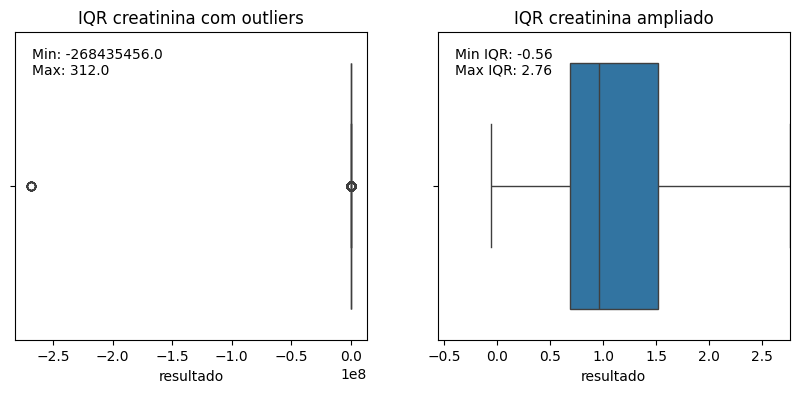

In [26]:
plot_boxplot_distant_and_close(df_creatinine, 'resultado', 'creatinina') # Plota um boxplot comparativo para a coluna especificada

**Dicionário de manipulações**

A seguir está a criação de um dicionario em python que reúne em um só lugar as etapas de manipulação deste dataset e seus respectivos argumentos. Lembrando que para maiores informações sobre o funcionamento interno de cada função auxiliar personalizada aplicada, verifique na pasta "notebooks/functions/" deste projeto.

In [27]:
creatinine_args = { # Dicionário de argumentos para o tratamento e enriquecimento do dataset de creatinina

    # Features a serem removidas do dataset
    'to_drop': [], # Nenhuma feature será removida

    # Features a serem renomeadas, visando facilitar a manipulação dos dados e interpretação
    'to_rename': {
        'datainternacao': 'dt_internacao',
        'dthr_programada': 'dt_creatinina',
        'resultado': 'valor_creatinina',
    },

    # Features a serem convertidas para o tipo de dado especificado
    'to_parse': {
        'to_datetime': { # Conversão de colunas para o tipo datetime
            'function': parse_datetime, # Função para conversão para datetime personalizada
            'columns':[
                'dt_nascimento',
                'dt_internacao',
                'dt_creatinina',
            ],
            'args': {
                'column': 'dt_nascimento',
                'column':'dt_internacao',
                'column':'dt_creatinina',
            }
        },
        'to_string': { # Conversão de colunas para o tipo string
            'function': pd.DataFrame.astype, # Função para conversão para string
            'columns':[
                'prontuario'
            ],
            'args': {
                'dtype': 'str'
            }
        },
    },

    'to_eliminate': { # Eliminação de registros que não atendem as regras de validação
        'valid_hospitalization_start': { # Eliminação de registros cuja data de internação é menor que 01/01/2018
            'function': keep_only_valid_records, # Esta função mantém apenas os registros que atendem !! DENTRO !! da condição especificada
            'args': {
                'first': 'dt_internacao',
                'operation': '>=',
                'second': '2018-01-01',
                'second_is_constant': True,
            },
        },
        'valid_hospitalization_end': { # Eliminação de registros cuja data de internação é maior ou igual a 01/01/2023
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_internacao',
                'operation': '<',
                'second': '2023-01-01',
                'second_is_constant': True,
            },
        },
        'valid_creatinine_collection_start': { # Eliminação de registros cuja data de coleta de creatinina é menor que 01/01/2018
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_creatinina',
                'operation': '>=',
                'second': '2018-01-01',
                'second_is_constant': True,
            },
        },
        'valid_creatinine_collection_end': { # Eliminação de registros cuja data de coleta de creatinina é maior ou igual a 01/01/2023
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_creatinina',
                'operation': '<',
                'second': '2023-01-01',
                'second_is_constant': True,
            },
        },
        'valid_records_of_hospitalization': { # Eliminação de registros cuja data de internação é maior que a data de coleta de creatinina
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_creatinina',
                'operation': '>=',
                'second': 'dt_internacao',
            },
        },
        'valid_value_of_creatinine': { # Eliminação de registros cujo valor de creatinina é menor ou igual ao limite inferior adotado (0)
            'function': keep_only_valid_records,
            'args': {
                'first': 'valor_creatinina',
                'operation': '>',
                'second': 0,
                'second_is_constant': True,
            },
        },
        'valid_value_of_non_urine_creatinine': { # Eliminação de registros cujo valor de creatinina é maior ao limite superior adotado (5)
            'function': keep_only_valid_records,
            'args': {
                'first': 'valor_creatinina',
                'operation': '<=',
                'second': 5,
                'second_is_constant': True,
            },
        },
    },

    # Preenchimento de valores nulos
    'to_fill': {}, # Nenhum valor nulo será preenchido
    
    # Features a serem criadas a partir de features já existentes para enriquecer o dataset
    'to_feature_enginner': {
        'split_datetime': { # Extrai data da coluna de data e hora 
            'function': split_datetime,
            'args': {},
            'to_drop': ['dt_nascimento_date'],
        },
        'create_uid': { # Criação de identificador único para cada prontuário e data de internação no formato uid_prontuario + dt_internacao
            'function': create_uid,
            'args':{},
            'to_drop': ['dt_internacao_date'],
        },
        'calculate_age': { # Criação de feature para a idade do paciente em anos
            'function': calculate_age,
            'args': {},
            'to_drop': ['dt_nascimento'],
        },
        'identify_hospitalization_time': { # Criação de feature para **contar** o número da internação de cada paciente no momento da coleta de creatinina
            'function': identify_hospitalization_time,
            'args': {},
            'to_drop': [],
        },
        'time_diff_creatinine_collection_and_hospitalization': { # Criação de feature para calcular o **tempo** entre a data de internação e a respectiva data da coleta de creatinina
            'function': time_diff_collection_and_hospitalization,
            'args': {
                'dt_collection': 'dt_creatinina',
            },
            'to_drop': [],
        },
        'time_diff_between_creatinine_collections': { # Criação de feature para calcular o **tempo** entre a data da coleta de creatinina atual e a anterior (em janela temporal de ate 2 coletas anteriores)
            'function': time_diff_between_collections,
            'args': {
                'dt_collection': 'dt_creatinina',
            },
            'to_drop': [],
        },
        'identify_creatinine_collection_time': { # Criação de feature para **contar** o número da coleta de creatinina de cada paciente no momento da coleta
            'function': identify_collection_time,
            'args': {},
            'to_drop': [],
        },
        'value_variation_between_creatinine_collections': { # Criação de feature para calcular a **variação** da creatinina entre a coleta atual e a anterior (em janela temporal de ate 2 coletas anteriores)
            'function': value_variation_between_collections,
            'args': {
                'collection': 'valor_creatinina',
                'dt_collection': 'dt_creatinina',
            },
            'to_drop': [],
        },
        'identify_ira': { # Criação de feature para identificar ocorrência da IRA de acordo com as regras de validação (considerando apenas o caso temporal de 2 coletas anteriores, 48 horas, caso existente)
            'function': identify_ira,
            'args':{},
            'to_drop': [],
        },
        'label_creatinine_target': { # Criação de feature alvo (para rotular) a creatinina 2 períodos a frente, caso exista
            'function': label_target,
            'args': {
                'target': 'valor_creatinina',
            },
            'to_drop': [],
        },
        'label_ira_target': { # Criação de uma feature alvo (para rotular) a IRA 2 períodos a frente, caso exista
            'function': label_target,
            'args': {
                'target': 'ira',
            },
            'to_drop': [],
        }
    },

    # Serie de transformações finais do dataset para o formato desejado
    'to_transform': {},
    
}

#### 3.1.2 Limpeza

Ao inicio de cada etapa de manipulação de dados desta análise será feito uma copia do conjunto de dados subsequente para facilitar o desenvolvimento e validação.

In [28]:
df_creatinine_clean = df_creatinine.copy() # Cria uma copia do dataset de creatinina para ser manipulado sem alterar o anterior

**Eliminação inicial de features:** Eliminação de colunas (features) que não serão utilizadas na análise, ou que possuem informações irrelevantes ou redundante, se possível ou necessário.

In [29]:
#df_creatinine_clean = df_creatinine_clean.drop(columns=creatinine_args['to_drop']) # Remove as colunas do dataset

Neste caso, não houve necessidade de eliminação inicial, em virtude da constante evolução desta análise. Algumas destas eliminação de features irrelevantes foram alteradas diretamente nas queries de consulta SQL.

**Renomeação de features:** Renomeação de colunas para facilitar a manipulação dos dados e a interpretação.

In [30]:
df_creatinine_clean = df_creatinine_clean.rename(columns=creatinine_args['to_rename']) # Renomeia as colunas do dataset

**Parsing de dados:** Conversão de dados para o formato adequado.

In [31]:
for parse_type in creatinine_args['to_parse']: # Itera sobre os tipos de conversão de dados
    try: # Tentiva de execução
        for column in creatinine_args['to_parse'][parse_type]['columns']: # Itera sobre as colunas a serem convertidas
            df_creatinine_clean[column] = creatinine_args['to_parse'][parse_type]['function'](df_creatinine_clean[column], **creatinine_args['to_parse'][parse_type]['args']) # Converte os dados da coluna para o tipo especificado
        print(f'-> {parse_type}: OK') # Mostra o tipo de conversão de dados
    except Exception as e: # Tratamento de exceção
        print(f'-> {parse_type}: ! FAIL !')
        print(f'[{parse_type}] {e}')

-> to_datetime: OK
-> to_string: OK


**Eliminação de registros:** Eliminação de registros inválidos ou outliers. 
Neste caso, iremos eliminar todos os registros de cada paciente com internação única que teve algum registro invalido, uma vez que não podemos assegurar a qualidade dos registros de eventos deste paciente.

Eliminamos inválidos por:
* internação (ou coleta) previa ou posterior ao recorte de tempo deste projeto: 2018-2022
* internação posterior ao inicio do registro de eventos
* níveis de creatinina abaixo de 0
* níveis de creatinina nulos
* níveis de creatinina superiores a 5

In [32]:
for elimination in creatinine_args['to_eliminate']: # Itera sobre os tipos de eliminação de dados
    try:
        len_before = len(df_creatinine_clean) # Armazena o tamanho do dataset antes da eliminação
        df_creatinine_clean = creatinine_args['to_eliminate'][elimination]['function'](df_creatinine_clean, **creatinine_args['to_eliminate'][elimination]['args']) # Elimina os dados de acordo com a regra de validação especificada
        len_after = len(df_creatinine_clean) # Armazena o tamanho do dataset depois da eliminação
        print(f'-> {elimination}: OK') # Mostra o tipo de eliminação de dados
        print(f'[{elimination}] {len_before - len_after} records eliminated') # Mostra a quantidade de registros eliminados
        print("\n")
    except Exception as e:
        print(f'-> {elimination}: ! FAIL !')
        print(f'[{elimination}] {e}')

--Before--
[count_unique_uids] unique uid: 18525
[count_unique_uids] unique patients: 15099
--after--
[count_unique_uids] unique uid: 18447
[count_unique_uids] unique patients: 15044
-> valid_hospitalization_start: OK
[valid_hospitalization_start] 597 records eliminated


--Before--
[count_unique_uids] unique uid: 18447
[count_unique_uids] unique patients: 15044
--after--
[count_unique_uids] unique uid: 17027
[count_unique_uids] unique patients: 13877
-> valid_hospitalization_end: OK
[valid_hospitalization_end] 7571 records eliminated


--Before--
[count_unique_uids] unique uid: 17027
[count_unique_uids] unique patients: 13877
--after--
[count_unique_uids] unique uid: 17027
[count_unique_uids] unique patients: 13877
-> valid_creatinine_collection_start: OK
[valid_creatinine_collection_start] 0 records eliminated


--Before--
[count_unique_uids] unique uid: 17027
[count_unique_uids] unique patients: 13877
--after--
[count_unique_uids] unique uid: 16931
[count_unique_uids] unique patient

**Preenchimento de dados:** Preenchimento de dados faltantes conforme regras estabelecidas, se possivel ou necessario.

In [33]:
#for fill in creatinine_args['to_fill']: # Itera sobre os tipos de preenchimento de dados
#    try:
#        df_creatinine_clean = creatinine_args['to_fill'][fill]['function'](df_creatinine_clean, **creatinine_args['to_fill'][fill]['args']) # Preenche os dados de acordo com a regra de preenchimento especificada
#        print(f'-> {fill}: OK') # Mostra o tipo de preenchimento de dados
#    except Exception as e:
#        print(f'-> {fill}: ! FAIL !')
#        print(f'[{feature_name}] {e}')

Neste caso, não houve necessidade de preenchimentos.

**Visualização geral do estado atual do dataset**

In [34]:
df_creatinine_clean.info()
df_creatinine_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97552 entries, 0 to 97551
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   prontuario        97552 non-null  object        
 1   dt_nascimento     97552 non-null  datetime64[ns]
 2   dt_internacao     97552 non-null  datetime64[ns]
 3   dt_creatinina     97552 non-null  datetime64[ns]
 4   valor_creatinina  97552 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(1)
memory usage: 3.7+ MB


,prontuario,dt_nascimento,dt_internacao,dt_creatinina,valor_creatinina
0,4543690,1953-02-11,2018-10-17 01:32:00,2018-11-05 23:47:00,0.98
1,5055561,1963-10-14,2020-04-10 15:32:00,2020-05-03 09:58:00,0.95
2,5056189,1942-05-01,2020-04-22 16:38:00,2020-04-22 23:31:00,1.14
3,4433074,1968-07-12,2018-06-28 20:06:00,2018-06-30 12:06:00,0.52
4,5192885,1974-05-26,2021-06-05 21:58:00,2021-06-05 22:13:00,1.12


In [35]:
df_creatinine_clean.isnull().sum() 

prontuario          0
dt_nascimento       0
dt_internacao       0
dt_creatinina       0
valor_creatinina    0
dtype: int64

In [36]:
df_creatinine_clean.describe(include='all')

,prontuario,dt_nascimento,dt_internacao,dt_creatinina,valor_creatinina
count,97552,97552,97552,97552,97552.00
unique,13173,NaN,NaN,NaN,NaN
top,4342341,NaN,NaN,NaN,NaN
freq,252,NaN,NaN,NaN,NaN
mean,NaN,1962-10-25 03:49:20.095128736,2020-07-05 22:12:26.337953280,2020-07-22 02:02:13.068968192,1.10
min,NaN,1915-07-22 00:00:00,2018-01-01 15:54:00,2018-01-01 16:53:00,0.01
25%,NaN,1949-08-18 00:00:00,2019-05-07 21:18:00,2019-05-22 22:52:00,0.67
50%,NaN,1961-02-19 00:00:00,2020-07-25 16:14:00,2020-08-08 20:47:30,0.90
75%,NaN,1975-02-24 00:00:00,2021-09-04 16:59:00,2021-09-18 13:10:30,1.28
max,NaN,2004-05-20 00:00:00,2022-12-30 10:32:00,2022-12-31 09:47:00,5.00


Os beneficios da conversão de tipos já é perceptivel pela saida do metodo .describe(), uma vez que agora temos acesso a estatisticas diferentes. Além disso, agora possuimos um intervalo de valores consistente para os exames de creatinina.

**Exploração do dataset**

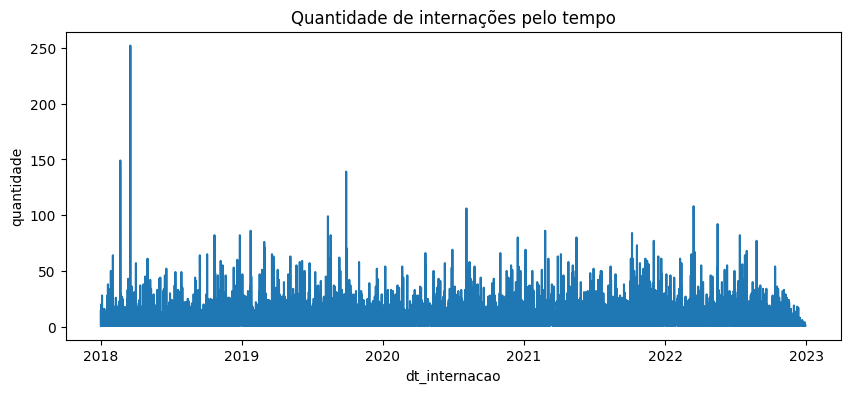

In [37]:
_ = df_creatinine_clean.groupby(['prontuario', 'dt_internacao']).size().reset_index(name='quantidade') # Agrupa os dados 
plot_line_chart_count_by_date(_, 'dt_internacao', 'quantidade', 'Quantidade de internações pelo tempo') # Plota um gráfico de linha por data

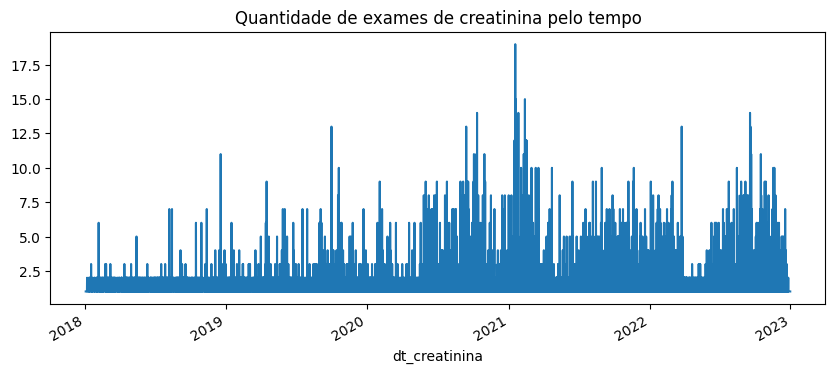

In [38]:
plot_line_chart_count_by_date(df_creatinine_clean, 'dt_creatinina', title='Quantidade de exames de creatinina pelo tempo')

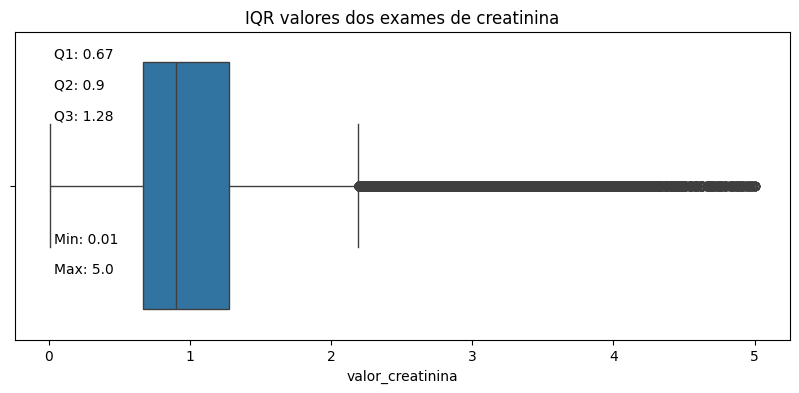

In [39]:
plot_boxplot(df_creatinine_clean, 'valor_creatinina', 'valores dos exames de creatinina', True) # Plota um boxplot para a coluna especificada

#### 3.1.3 Engenharia

In [40]:
df_creatinine_enginnered = df_creatinine_clean.copy()

**Engenharia inicial de variáveis:** criação de novas variáveis a partir de variáveis existentes para enriquecer a análise, facilitar o treinamento de modelos de machine learning e a interpretação dos resultados:

* Feature de data
* Identificador único de internação
* Idade
* Número da internação no momento da coleta
* Features de diferença temporal entre coletas e/ou referencial
* Features de variação entre valores de exames
* Identificação de IRA

Atenção! Foram preparadas features que representam o histórico de cada paciente de dentro de uma janela temporal de 2 coletas.

Foi adotado a metodologia de janelas de coleta, em virtude da não padronização dos intervalos de entre exames, por procedimentos internos. É considerado pelo HU-UFPI que se não ocorreu a solicitação de exame até aquele momento, que não houve alteração significativa no paciente e a Creatinina deve ser considerada igual à ultima checagem.

A janela de 1 coleta ocorre a partir de 20h desde o ultimo exame, representando 24 horas; a janela de 2 coletas ocorre a partir de 40 horas desde o penúltimo exame, representando 48 horas.

Será considerada apenas a janela de 2 coletas para identificação de IRA, sendo considerado como **positivo para a ocorrência de IRA quando a variação do valor do exame entre as coletas em um período entre 40 a 72 horas for superior a 30%**. Nos casos em que as features não respeitem as regras de intervalo de tempo, será retornado NAN.

**Rotulação de dados:** Rotulação de duas possíveis features alvo, creatinina e IRA. A rotulação se deu pelo deslocamento do resultado de 1 períodos de tempo ( 24 horas ) a frente:

* apresentara_ira
* apresentara_creatinina

In [41]:
for feature_name, feature_args in creatinine_args['to_feature_enginner'].items(): # Loop para criar as features de acordo com o dicionario de argumentos
    try:
        df_creatinine_enginnered = feature_args['function'](df_creatinine_enginnered, **feature_args['args']) # Chama a função de criação da feature com os argumentos especificados
        df_creatinine_enginnered = df_creatinine_enginnered.drop(columns=feature_args['to_drop']) # Remove determinadas colunas do dataset caso especificado
        print(f'-> {feature_name}: OK') # Mostra o nome da feature que esta sendo criada
    except Exception as e: # Caso ocorra algum erro na criação da feature, e armazena o erro na variável e
        print(f'-> {feature_name}: ! FAIL !')
        print(f'[{feature_name}] {e}')

-> split_datetime: OK
[count_unique_uids] unique uid: 16158
[count_unique_uids] unique patients: 13173
-> create_uid: OK
-> calculate_age: OK
-> identify_hospitalization_time: OK
-> time_diff_creatinine_collection_and_hospitalization: OK
-> time_diff_between_creatinine_collections: OK
-> identify_creatinine_collection_time: OK
-> value_variation_between_creatinine_collections: OK
-> identify_ira: OK
-> label_creatinine_target: OK
-> label_ira_target: OK


**Visualização geral do estado atual do dataset**

In [42]:
df_creatinine_enginnered.info()
df_creatinine_enginnered.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97552 entries, 0 to 97551
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   prontuario                        97552 non-null  object         
 1   dt_internacao                     97552 non-null  datetime64[ns] 
 2   dt_creatinina                     97552 non-null  datetime64[ns] 
 3   valor_creatinina                  97552 non-null  float64        
 4   dt_creatinina_date                97552 non-null  object         
 5   uid_prontuario_dt_internacao      97552 non-null  object         
 6   idade                             97552 non-null  int64          
 7   n_internacoes                     97552 non-null  int32          
 8   diff_dt_creatinina_dt_internacao  97552 non-null  timedelta64[ns]
 9   diff_entre_dt_creatinina_1        81394 non-null  timedelta64[ns]
 10  diff_entre_dt_creatinina_2        

,prontuario,dt_internacao,dt_creatinina,valor_creatinina,dt_creatinina_date,uid_prontuario_dt_internacao,idade,n_internacoes,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,variacao_valor_creatinina_1,variacao_valor_creatinina_2,ira_1,ira,apresentara_valor_creatinina,apresentara_ira
0,10587,2021-03-20 12:12:00,2021-03-20 12:49:00,3.73,2021-03-20,10587_2021-03-20 12:12:00,84,1,0 days 00:37:00,NaT,NaT,1,NaN,NaN,NaN,NaN,NaN,NaN
1,10702,2022-11-07 05:38:00,2022-11-07 08:17:00,0.74,2022-11-07,10702_2022-11-07 05:38:00,50,1,0 days 02:39:00,NaT,NaT,1,NaN,NaN,NaN,NaN,0.84,NaN
2,10702,2022-11-07 05:38:00,2022-11-08 09:56:00,0.84,2022-11-08,10702_2022-11-07 05:38:00,50,1,1 days 04:18:00,1 days 01:39:00,NaT,2,0.14,NaN,NaN,NaN,NaN,NaN
3,10975,2021-05-23 00:05:00,2021-05-23 00:09:00,2.43,2021-05-23,10975_2021-05-23 00:05:00,85,1,0 days 00:04:00,NaT,NaT,1,NaN,NaN,NaN,NaN,NaN,NaN
4,10975,2021-05-23 00:05:00,2021-05-26 11:24:00,0.98,2021-05-26,10975_2021-05-23 00:05:00,85,1,3 days 11:19:00,3 days 11:15:00,NaT,2,-0.60,NaN,NaN,NaN,NaN,0.00


A partir do enriquecimento de dados, apenas com insights sobre o conjunto foi possível expandir a coleção de features de 5 para 18.

São observáveis valores NaT nas features temporais, provenientes do enriquecimento, identificadas pelo prefixo diff_. Esses valores são análogos a nulos para variáveis do tipo datetime. Estes são esperados, uma vez que por meio da técnica de janelas temporais registos prévios ou posteriores podem não estar disponíveis ocasionando o NaT.

São observáveis valores NaN nas features rotuladas e de variação de valores, identificadas respectivamente pelos prefixos apresentara_ e variacao_, novamente por causa da técnica de janelas temporais. Além disso, que mesmo possuindo registros prévios ou posteriores, as feature rotuladas podem apresentar NaN se o resultado 2 períodos de tempo a frente não obedecer o intervalo de tempo estabelecido.

Esses valores nulos serão eliminados na etapa de preparação do dataset final.

A feature que representa o numero da internação do paciente no momento do exame não agrega ao estudo por não apresentar variância, logo também será eliminada

In [43]:
df_creatinine_enginnered.isnull().sum()

prontuario                              0
dt_internacao                           0
dt_creatinina                           0
valor_creatinina                        0
dt_creatinina_date                      0
uid_prontuario_dt_internacao            0
idade                                   0
n_internacoes                           0
diff_dt_creatinina_dt_internacao        0
diff_entre_dt_creatinina_1          16158
diff_entre_dt_creatinina_2          27193
n_coletas_creatinina                    0
variacao_valor_creatinina_1         16158
variacao_valor_creatinina_2         27193
ira_1                               73230
ira                                 73230
apresentara_valor_creatinina        58842
apresentara_ira                     73230
dtype: int64

As features que se baseiam na técnica de janelas temporais, fazem uso de eventos prévios ou subsequentes, que nem sempre estão disponíveis, portanto é natural a presença de dados nulos caso.

In [44]:
df_creatinine_enginnered.describe(include='all')

,prontuario,dt_internacao,dt_creatinina,valor_creatinina,dt_creatinina_date,uid_prontuario_dt_internacao,idade,n_internacoes,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,variacao_valor_creatinina_1,variacao_valor_creatinina_2,ira_1,ira,apresentara_valor_creatinina,apresentara_ira
count,97552,97552,97552,97552.00,97552,97552,97552.00,97552.00,97552,81394,70359,97552.00,81394.00,70359.00,24322.00,24322.00,38710.00,24322.00
unique,13173,NaN,NaN,NaN,1826,16158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4342341,NaN,NaN,NaN,2021-02-09,4342341_2018-03-18 22:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,252,NaN,NaN,NaN,89,252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2020-07-05 22:12:26.337953280,2020-07-22 02:02:13.068968192,1.10,NaN,NaN,57.20,1.00,16 days 03:49:46.731015253,2 days 06:18:54.386158684,4 days 06:37:08.017211728,9.49,0.02,0.04,0.11,0.11,1.30,0.11
min,NaN,2018-01-01 15:54:00,2018-01-01 16:53:00,0.01,NaN,NaN,18.00,1.00,0 days 00:01:00,0 days 00:00:00,0 days 00:00:00,1.00,-0.99,-0.99,0.00,0.00,0.01,0.00
25%,NaN,2019-05-07 21:18:00,2019-05-22 22:52:00,0.67,NaN,NaN,45.00,1.00,2 days 18:21:00,0 days 23:57:00,2 days 00:44:00,2.00,-0.11,-0.14,0.00,0.00,0.71,0.00
50%,NaN,2020-07-25 16:14:00,2020-08-08 20:47:30,0.90,NaN,NaN,59.00,1.00,9 days 17:00:30,1 days 19:22:00,3 days 07:19:00,5.00,-0.01,-0.02,0.00,0.00,1.03,0.00
75%,NaN,2021-09-04 16:59:00,2021-09-18 13:10:30,1.28,NaN,NaN,70.00,1.00,21 days 20:41:00,2 days 22:13:45,5 days 06:01:30,11.00,0.10,0.13,0.00,0.00,1.63,0.00
max,NaN,2022-12-30 10:32:00,2022-12-31 09:47:00,5.00,NaN,NaN,107.00,1.00,453 days 11:28:00,56 days 00:53:00,66 days 00:14:00,252.00,91.00,85.00,1.00,1.00,5.00,1.00


Por meio da descrição estatística são observáveis fortes outliers pontuais que podem interferir no desenvolvimento do modelo: nas diferenças de tempo entre coletas e nas variações dos valores dos exames. Estes outliers pontuais devem ser removidos na etapa de preparação do dataset final.

**Exploração do dataset**

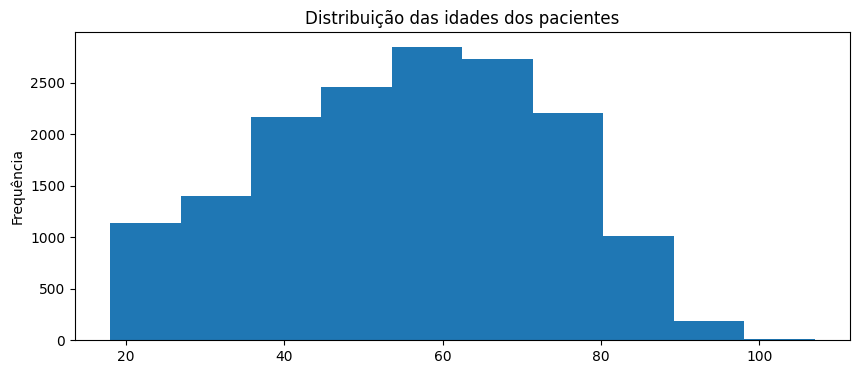

In [45]:
_ = df_creatinine_enginnered.groupby(['uid_prontuario_dt_internacao'])['idade'].max().reset_index()
plot_histogram(_, 'idade', 'Distribuição das idades dos pacientes') # Plota um histograma para a coluna especificada

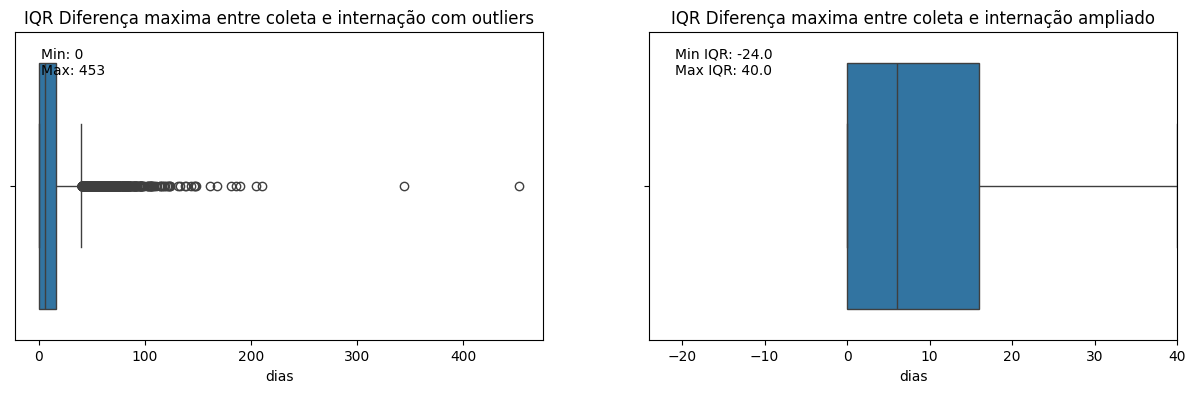

In [46]:
_ = df_creatinine_enginnered.groupby(['uid_prontuario_dt_internacao'])['diff_dt_creatinina_dt_internacao'].max().reset_index(name='dias')
plot_boxplot_distant_and_close(_, 'dias', 'Diferença maxima entre coleta e internação', 'd', size=(15,4))

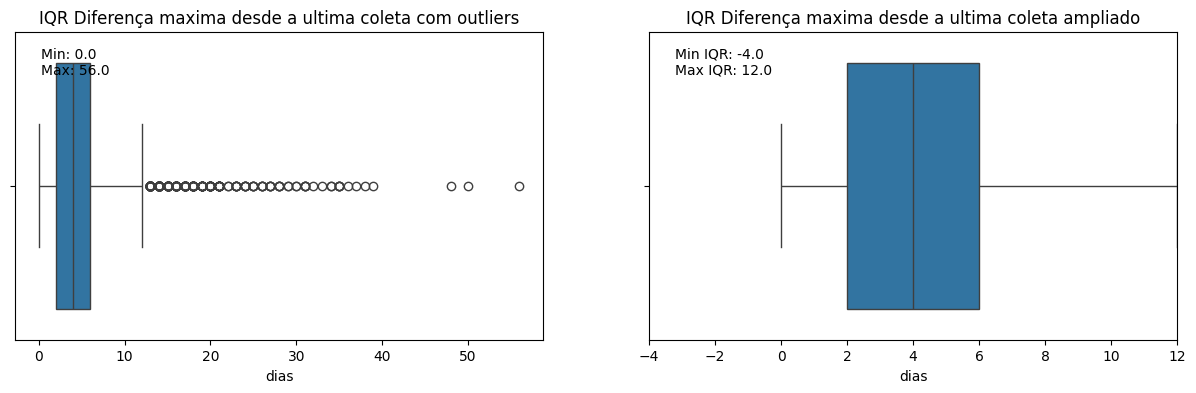

In [47]:
_ = df_creatinine_enginnered.groupby(['uid_prontuario_dt_internacao'])['diff_entre_dt_creatinina_1'].max().reset_index(name='dias')
plot_boxplot_distant_and_close(_, 'dias', 'Diferença maxima desde a ultima coleta', 'd', size=(15,4))

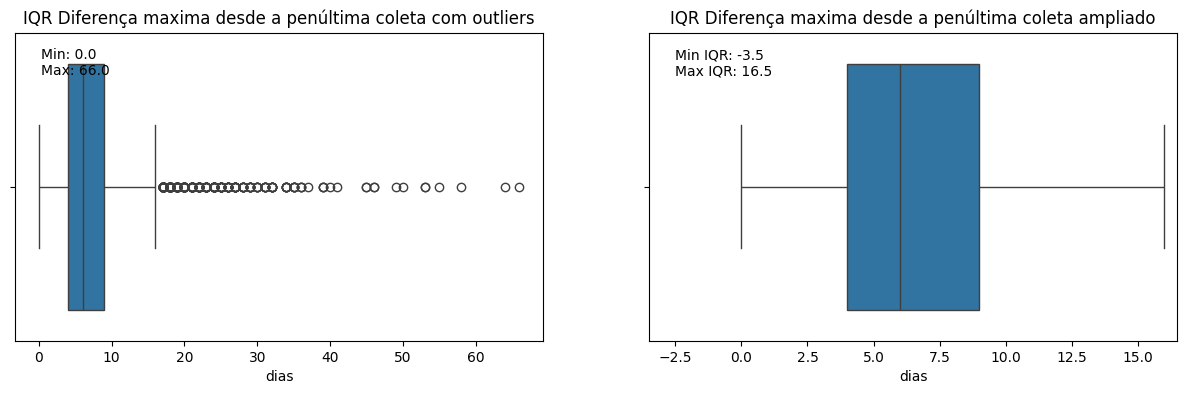

In [48]:
_ = df_creatinine_enginnered.groupby(['uid_prontuario_dt_internacao'])['diff_entre_dt_creatinina_2'].max().reset_index(name='dias')
plot_boxplot_distant_and_close(_, 'dias', 'Diferença maxima desde a penúltima coleta', 'd', size=(15,4))

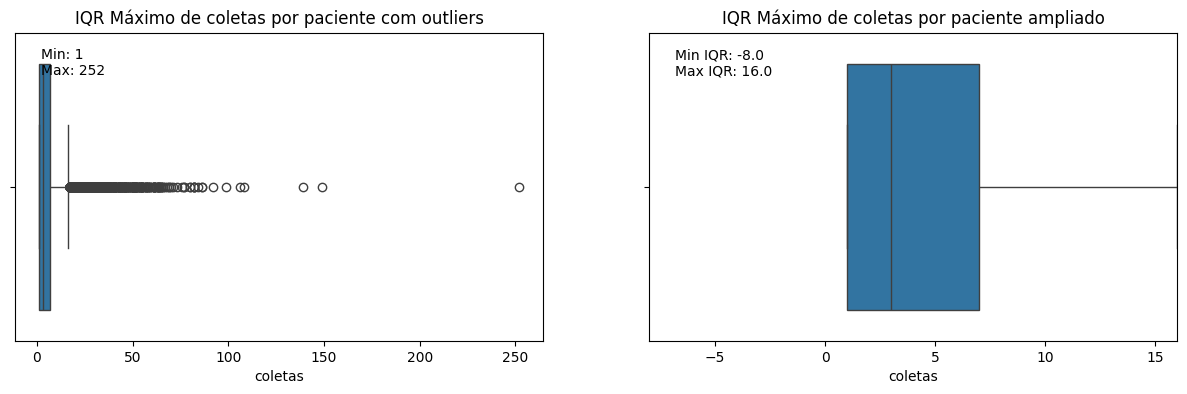

In [49]:
_ = df_creatinine_enginnered.groupby(['uid_prontuario_dt_internacao'])['n_coletas_creatinina'].max().reset_index(name='coletas')
plot_boxplot_distant_and_close(_, 'coletas', 'Máximo de coletas por paciente', size=(15,4))

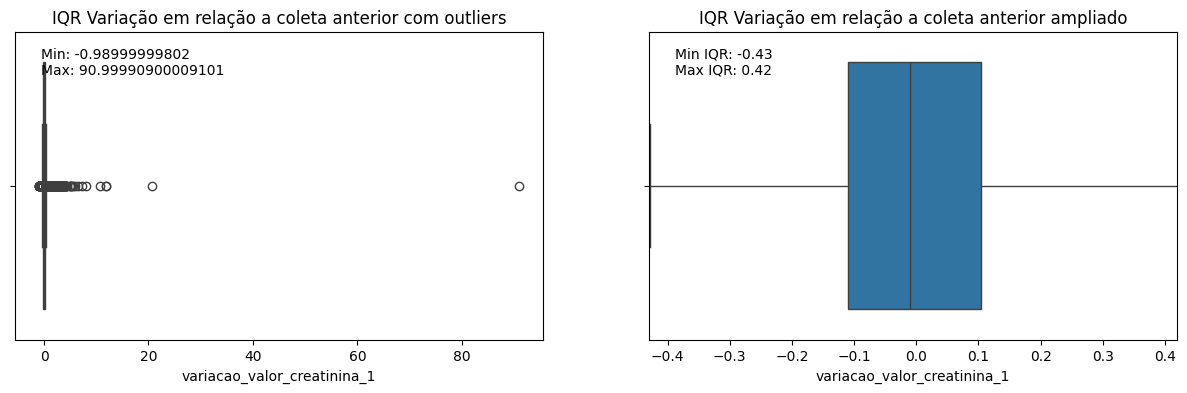

In [50]:
plot_boxplot_distant_and_close(df_creatinine_enginnered, 'variacao_valor_creatinina_1', 'Variação em relação a coleta anterior', size=(15,4))

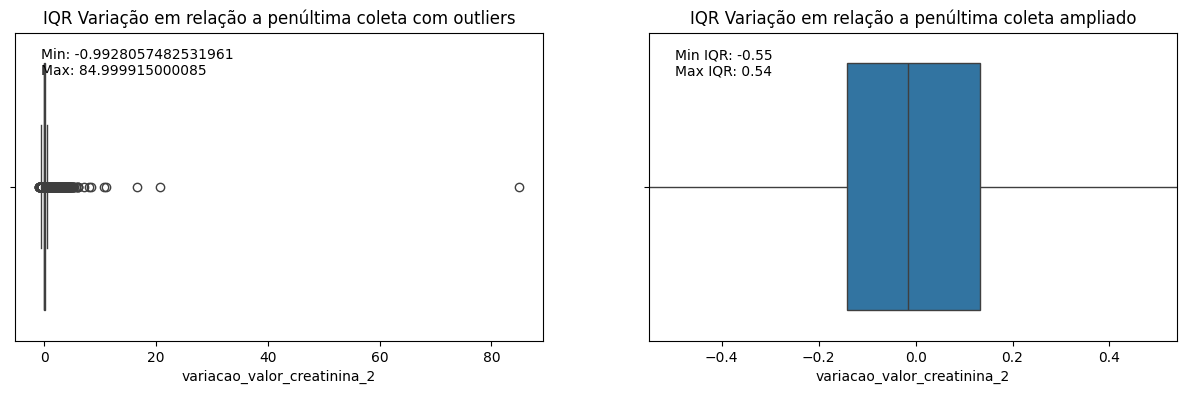

In [51]:
plot_boxplot_distant_and_close(df_creatinine_enginnered, 'variacao_valor_creatinina_2', 'Variação em relação a penúltima coleta', size=(15,4))

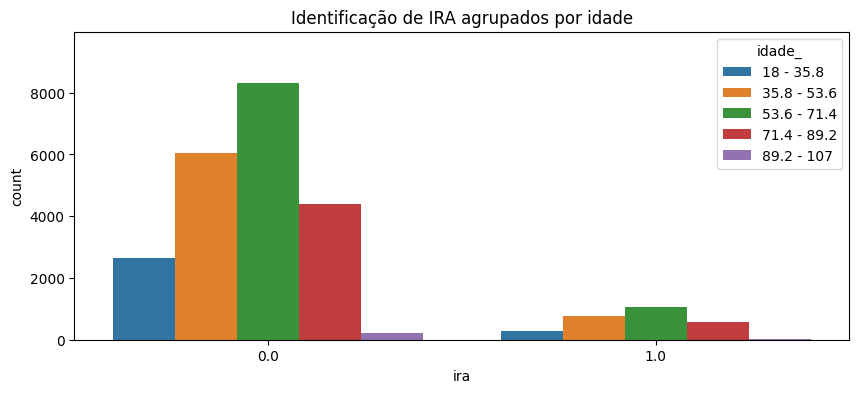

In [52]:
plot_bar_chart_count_by_column(df_creatinine_enginnered, 'ira', 'idade', 'Identificação de IRA agrupados por idade') # Plota um gráfico de barras para a contagem de registros

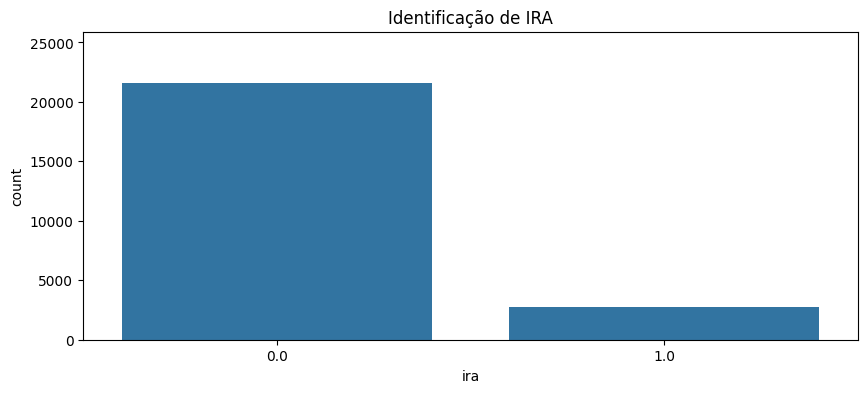

In [53]:
plot_bar_chart_count_by_column(df_creatinine_enginnered, 'ira', title='Identificação de IRA')

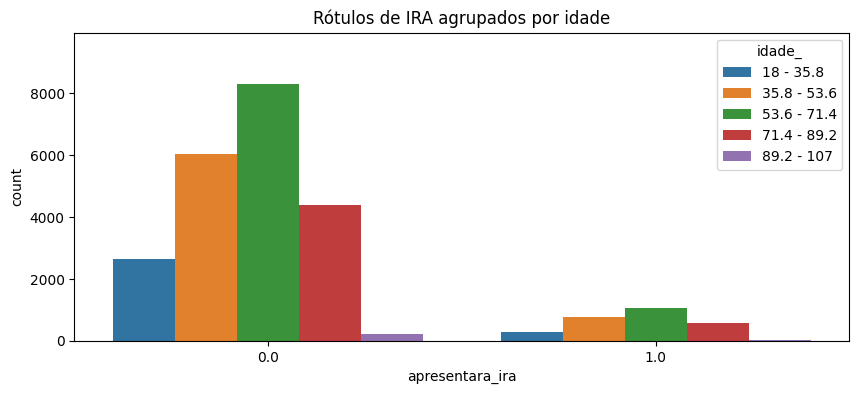

In [54]:
plot_bar_chart_count_by_column(df_creatinine_enginnered, 'apresentara_ira', 'idade', 'Rótulos de IRA agrupados por idade')

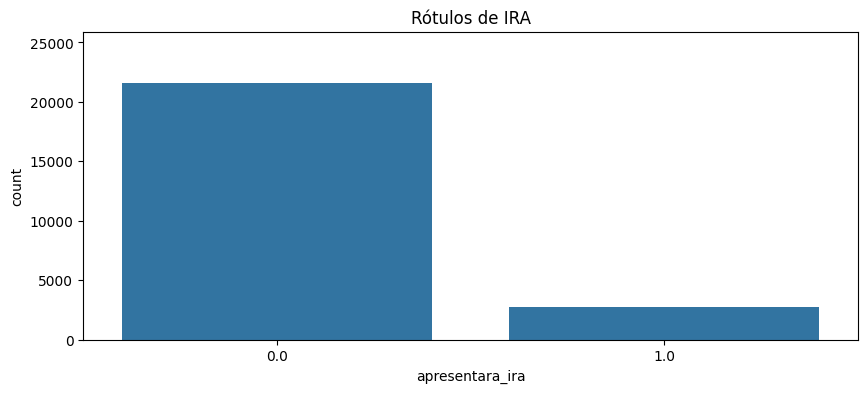

In [55]:
plot_bar_chart_count_by_column(df_creatinine_enginnered, 'apresentara_ira', title='Rótulos de IRA')

#### 3.1.4 Transformação

In [56]:
df_creatinine_transformed = df_creatinine_enginnered.copy()

In [57]:
#for transformation in creatinine_args['to_transform']: # Itera sobre os tipos de transformação de dados
#    try:
#        df_creatinine_transformed = creatinine_args['to_transform'][transformation]['function'](df_creatinine_transformed, **creatinine_args['to_transform'][transformation]['args']) # Transforma os dados de acordo com a regra especificada
#        print(f'-> {transformation}: OK') # Mostra o tipo de transformação de dados
#    except Exception as e:
#        print(f'-> {transformation}: ! FAIL !')
#        print(f'[{transformation}] {e}')

O formato desde dataset ja está ideal para analise e desenvolvimento, portanto esta etapa não precisa ser realizada.

#### 3.1.5 Exportação

Concluída a manipulação do dataset de creatinina, este será salvo na pasta "data/processed" deste projeto.

In [58]:
df_creatinine_final = df_creatinine_transformed.copy()

In [59]:
df_creatinine_final.to_csv(f'{PROCESSED_PATH}creatinina_processado.csv', sep=',', encoding='utf-8', index=False)

#### 3.1.6 Limpeza de memoria do python

In [60]:
# Procedimento de limpeza de memória
try:
    del df_creatinine_final, df_creatinine_transformed, df_creatinine_enginnered, df_creatinine_clean, df_creatinine, _
    del creatinine_args
    gc.collect()
except:
    pass

### 3.2. Base de dados de controle

#### 3.2.1 Descrição conceitual da Base de Dados

Conjunto de informações de eventos de aferições de diversos indicadores de controle, categorizados por grupo e subgrupo, para cada prontuario (que representa um paciente único). Dessa forma, um paciente pode ter mais de evento cada uma com um tipo de indicador. Vale a atenção que cada prontuario pode possuir uma ou mais internações.

Este é um dataset auxiliar para possivelmente complementar e enriquecer com features o dataset principal de creatinina. Durante o processo de manipulação do dataset será feita a transformação de um dataset vertical para um formato horizontal, com as informações aqui contidas expandidas em colunas próprias, em vez de agrupadas.

| Feature | Descrição | Formato Ideal | Nota |
|---------|-----------|---------|------|
| prontuario | ID de identificação do paciente | Integer | |
| dthr_internacao | Data de internação do paciente | Datetime | |
| grupo_controle | Classificação da leitura de controle do paciente | String | |
| tipo_controle | Tipo (sub-classificação) de controle do paciente | String | |
| data_hora | Data e hora da leitura de controle do paciente | Datetime | |
| medida | Valor da leitura de controle do paciente | Float | |
| alta | Indicador do tipo de alta do paciente | String | |

In [61]:
df_control = pd.read_csv(CONTROL_CSV, sep=',', encoding='utf-8')

**Visualização geral do estado atual do dataset**

In [62]:
df_control.info()
df_control.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424990 entries, 0 to 424989
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   prontuario       424990 non-null  int64  
 1   dthr_internacao  424990 non-null  object 
 2   grupo_controle   424990 non-null  object 
 3   tipo_controle    424990 non-null  object 
 4   data_hora        424990 non-null  object 
 5   medida           424949 non-null  float64
 6   alta             424990 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 22.7+ MB


,prontuario,dthr_internacao,grupo_controle,tipo_controle,data_hora,medida,alta
0,4117222,2018-11-07 17:11:00,Sinais Vitais,Pressão Arterial Sistólica,2018-11-07 22:00:00,130.00,PERMANENCIA
1,4117222,2018-11-07 17:11:00,Sinais Vitais,Pressão Arterial Diastólica,2018-11-07 22:00:00,90.00,PERMANENCIA
2,4117222,2018-11-07 17:11:00,Sinais Vitais,Frequência Cardíaca,2018-11-07 22:00:00,78.00,PERMANENCIA
3,4117222,2018-11-07 17:11:00,Sinais Vitais,Frequência Respiratória,2018-11-07 22:00:00,17.00,PERMANENCIA
4,4117222,2018-11-07 17:11:00,Sinais Vitais,Temperatura Axilar,2018-11-07 22:00:00,36.00,PERMANENCIA


In [63]:
df_control.isnull().sum()

prontuario          0
dthr_internacao     0
grupo_controle      0
tipo_controle       0
data_hora           0
medida             41
alta                0
dtype: int64

Devido a não padronização no procedimento de registro dos dados, alguns tipos de indicadores de controle não possuem valor, mas nestes casos o registro do evento em si é mais importante do que algum tipo de medição. Por este motivo durante a fase de preenchimento de dados faltantes será assumido para estes indicadores o valor simbólico booleano 1.

In [64]:
df_control.describe(include='all')

,prontuario,dthr_internacao,grupo_controle,tipo_controle,data_hora,medida,alta
count,424990.00,424990,424990,424990,424990,424949.00,424990
unique,NaN,683,4,14,53604,NaN,8
top,NaN,2018-09-19 06:54:00,Sinais Vitais,Pressão Arterial Sistólica,2018-03-06 22:00:00,NaN,PERMANENCIA
freq,NaN,4752,379202,79676,74,NaN,292791
mean,4669033.71,NaN,NaN,NaN,NaN,98.83,NaN
std,762010.58,NaN,NaN,NaN,NaN,1532.24,NaN
min,36855.00,NaN,NaN,NaN,NaN,0.00,NaN
25%,4234266.00,NaN,NaN,NaN,NaN,36.00,NaN
50%,4806816.00,NaN,NaN,NaN,NaN,68.00,NaN
75%,5297619.00,NaN,NaN,NaN,NaN,94.00,NaN


Embora a feature medida reúna indicadores de diversas naturezas e grandezas, o valor máximo apresentado é um forte outlier e deve ser analisado com cuidado.

**Dicionário de manipulações**

A seguir está a criação de outro dicionario em python que reúne em um só lugar as etapas de manipulação deste dataset e seus respectivos argumentos. Lembrando que para maiores informações do procedimento interno de cada função auxiliar aplicada, basta verificar na pasta "notebooks/functions/" deste projeto.

In [65]:
control_args = { # Dicionário de argumentos para o tratamento e enriquecimento do dataset de controle
    
    # Features a serem descartadas desde o início
    'to_drop': [],

    # Features a serem renomeadas, visando facilitar a manipulação dos dados e interpretação
    'to_rename': {
        'dthr_internacao': 'dt_internacao',
        'tipo_controle': 'tipo_controle',
        'data_hora': 'dt_controle',
        'medida': 'valor_controle',
    },

    # Features a serem convertidas para o tipo de dado especificado
    'to_parse': {
        'to_datetime': {
            'function': parse_datetime, # Função para conversão para datetime personalizada
            'columns':[
                'dt_internacao',
                'dt_controle',
            ],
            'args': {
                'column': 'dt_internacao',
                'column':'dt_controle',
            }
        },
        'to_string': {
            'function': pd.DataFrame.astype, # Função para conversão para string
            'columns':[
                'prontuario'
            ],
            'args': {
                'dtype': 'str'
            }
        },
    },

    'to_eliminate':{
        'valid_hospitalization_start': { # Eliminação de registros cuja data de internação é menor que 01/01/2018
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_internacao',
                'operation': '>=',
                'second': '2018-01-01',
                'second_is_constant': True,
            },
        },
        'valid_hospitalization_end': { # Eliminação de registros cuja data de internação é maior ou igual a 01/01/2023
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_internacao',
                'operation': '<',
                'second': '2023-01-01',
                'second_is_constant': True,
            },
        },
        'valid_control_collection_start': { # Eliminação de registros cuja data de coleta de controle é menor que 01/01/2018
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_controle',
                'operation': '>=',
                'second': '2018-01-01',
                'second_is_constant': True,
            },
        },
        'valid_control_collection_end': { # Eliminação de registros cuja data de coleta de controle é maior ou igual a 01/01/2023
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_controle',
                'operation': '<',
                'second': '2023-01-01',
                'second_is_constant': True,
            },
        },
        'valid_records_of_hospitalization': { # Eliminação de registros cuja data de internação é maior que a data de coleta de controle
            'function': keep_only_valid_records,
            'args': {
                'first': 'dt_controle',
                'operation': '>=',
                'second': 'dt_internacao',
            },
        },
        'null_control_value_that_is_not_elimination': { # Eliminação de registros cujo valor de controle é nulo e o tipo de controle não é 'Eliminação'
            'function': drop_null_values_that_are_not_type_elimination,
            'args': {},
        },
    },

    # Regras para preenchimento de dados faltantes
    'to_fill': {
        'of_type_elimination': { # Preenchimento de dados faltantes para a classe de controle 'Eliminação' em que o valor do controle
            'function': fill_collection_of_type_elimination,
            'args': {},
        }
    },

    # Features a serem criadas a partir de features já existentes para enriquecer o dataset
    'to_feature_enginner': {
        'split_datetime': { # Separação da data em coluna distinta
            'function': split_datetime,
            'args': {},
            'to_drop': [],
        },
        'create_uid': { # Criação de um identificador único para cada prontuário e data de internação
            'function': create_uid,
            'args':{},
            'to_drop': ['dt_internacao_date'],
        },
        'time_diff_control_collection_and_hospitalization': { # Criação de uma feature para calcular o tempo entre a data de internação e a data da coleta de controle
            'function': time_diff_collection_and_hospitalization,
            'args': {
                'dt_collection': 'dt_controle',
            },
            'to_drop': [],
        },
        'time_diff_between_control_collections': { # Criação de uma feature para calcular o tempo entre a data da coleta de controle atual e a anterior de mesmo tipo
            'function': time_diff_between_collections,
            'args': {
                'dt_collection': 'dt_controle',
                'group_by_tags': ['grupo_controle', 'tipo_controle']
            },
            'to_drop': [],
        },
        'value_variation_between_control_collections': { # Criação de uma feature para calcular a variação do controle entre a coleta atual e a anterior de mesmo tip
            'function': value_variation_between_collections,
            'args': {
                'collection': 'valor_controle',
                'dt_collection': 'dt_controle',
                'group_by_tags': ['grupo_controle', 'tipo_controle']
            },
            'to_drop': [],
        },
    },

    'to_transform': {
        'clean_up_types_of_control': { # Transformação de tipos de controle para facilitar a manipulação dos dados
            'function': keep_only_selected_types,
            'args': {},
            'to_drop': [],
        },
        'pivot_transformation': {
            'function': pivot,
            'args': {},
            'to_drop': [],
        },
    },
}

#### 3.2.2 Limpeza

In [66]:
df_control_clean = df_control.copy()

**Eliminação inicial de features:** Eliminação de colunas (features) que não serão utilizadas na análise, ou que possuem informações irrelevantes ou redundante, se possível ou necessário.

In [67]:
#df_control_clean = df_control_clean.drop(columns=control_args['to_drop'])

Neste caso, não houve necessidade de eliminação inicial, uma vez que, durante a atualização do análise algumas destas eliminação de features desnecessárias foram alteradas nas queries de consulta SQL.

**Renomeação de features:** Renomeação de colunas para facilitar a manipulação dos dados e a interpretação.

In [68]:
df_control_clean = df_control_clean.rename(columns=control_args['to_rename'])

**Parsing de dados:** Conversão de dados para o formato adequado.

In [69]:
for parse_type in control_args['to_parse']:
    try:
        for column in control_args['to_parse'][parse_type]['columns']:
            df_control_clean[column] = control_args['to_parse'][parse_type]['function'](df_control_clean[column], **control_args['to_parse'][parse_type]['args'])
        print(f'-> {parse_type}: OK')
    except Exception as e:
        print(f'-> {parse_type}: ! FAIL !')
        print(f'[{parse_type}] {e}')

-> to_datetime: OK
-> to_string: OK


**Eliminação de registros:** Eliminação de registros inválidos ou outliers. Neste caso, iremos eliminar todos os registros de cada paciente com internação única que teve algum registro invalido, uma vez que não podemos assegurar a qualidade dos registros de eventos daquele paciente, mesmo quando todos não são inválidos.

Eliminamos inválidos por: 
* internação (ou coleta) previa ou posterior ao recorte de tempo deste projeto: 2018-2022
* internação posterior ao inicio do registro de eventos
* valores de controle nulos que não sejam do tipo eliminação

A eliminação dos valores outliers ocorrerá na etapa de preparação do dataset final, tendo em vista que ainda é preciso pivotear o parte do dataset.

In [70]:
for elimination in control_args['to_eliminate']:
    try:
        len_before = len(df_control_clean)
        df_control_clean = control_args['to_eliminate'][elimination]['function'](df_control_clean, **control_args['to_eliminate'][elimination]['args'])
        len_after = len(df_control_clean)
        print(f'-> {elimination}: OK')
        print(f'[{elimination}] {len_before - len_after} records eliminated')
    except Exception as e:
        print(f'-> {elimination}: ! FAIL !')
        print(f'[{elimination}] {e}')

--Before--
[count_unique_uids] unique uid: 684
[count_unique_uids] unique patients: 667
--after--
[count_unique_uids] unique uid: 684
[count_unique_uids] unique patients: 667
-> valid_hospitalization_start: OK
[valid_hospitalization_start] 0 records eliminated
--Before--
[count_unique_uids] unique uid: 684
[count_unique_uids] unique patients: 667
--after--
[count_unique_uids] unique uid: 605
[count_unique_uids] unique patients: 588
-> valid_hospitalization_end: OK
[valid_hospitalization_end] 41167 records eliminated
--Before--
[count_unique_uids] unique uid: 605
[count_unique_uids] unique patients: 588
--after--
[count_unique_uids] unique uid: 583
[count_unique_uids] unique patients: 567
-> valid_control_collection_start: OK
[valid_control_collection_start] 25554 records eliminated
--Before--
[count_unique_uids] unique uid: 583
[count_unique_uids] unique patients: 567
--after--
[count_unique_uids] unique uid: 562
[count_unique_uids] unique patients: 546
-> valid_control_collection_end:

**Preenchimento de dados:** Preenchimento de dados faltantes conforme regras estabelecidas. Assumindo valor 1 para registros do tipo eliminação.

In [71]:
for fill in control_args['to_fill']:
    try:
        df_control_clean = control_args['to_fill'][fill]['function'](df_control_clean, **control_args['to_fill'][fill]['args'])
        print(f'-> {fill}: OK')
    except Exception as e:
        print(f'-> {fill}: ! FAIL !')
        print(f'[{fill}] {e}')

-> of_type_elimination: OK


**Visualização geral do estado atual do dataset**

In [72]:
df_control_clean.info()
df_control_clean.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263425 entries, 0 to 263424
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   prontuario      263425 non-null  object        
 1   dt_internacao   263425 non-null  datetime64[ns]
 2   grupo_controle  263425 non-null  object        
 3   tipo_controle   263425 non-null  object        
 4   dt_controle     263425 non-null  datetime64[ns]
 5   valor_controle  263425 non-null  float64       
 6   alta            263425 non-null  object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 14.1+ MB


,prontuario,dt_internacao,grupo_controle,tipo_controle,dt_controle,valor_controle,alta
0,4117222,2018-11-07 17:11:00,Sinais Vitais,Pressão Arterial Sistólica,2018-11-07 22:00:00,130.00,PERMANENCIA
1,4117222,2018-11-07 17:11:00,Sinais Vitais,Pressão Arterial Diastólica,2018-11-07 22:00:00,90.00,PERMANENCIA
2,4117222,2018-11-07 17:11:00,Sinais Vitais,Frequência Cardíaca,2018-11-07 22:00:00,78.00,PERMANENCIA
3,4117222,2018-11-07 17:11:00,Sinais Vitais,Frequência Respiratória,2018-11-07 22:00:00,17.00,PERMANENCIA
4,4117222,2018-11-07 17:11:00,Sinais Vitais,Temperatura Axilar,2018-11-07 22:00:00,36.00,PERMANENCIA


In [73]:
df_control_clean.isnull().sum()

prontuario        0
dt_internacao     0
grupo_controle    0
tipo_controle     0
dt_controle       0
valor_controle    0
alta              0
dtype: int64

In [74]:
df_control_clean.describe(include='all')

,prontuario,dt_internacao,grupo_controle,tipo_controle,dt_controle,valor_controle,alta
count,263425,263425,263425,263425,263425,263425.00,263425
unique,496,NaN,4,14,NaN,NaN,8
top,4341483,NaN,Sinais Vitais,Pressão Arterial Sistólica,NaN,NaN,PERMANENCIA
freq,3906,NaN,235070,49342,NaN,NaN,209248
mean,NaN,2020-06-10 05:21:39.035702528,NaN,NaN,2020-07-23 21:47:39.731992064,89.35,NaN
min,NaN,2018-01-04 07:48:00,NaN,NaN,2018-01-04 10:18:00,0.00,NaN
25%,NaN,2018-11-07 17:11:00,NaN,NaN,2019-01-26 16:46:00,36.00,NaN
50%,NaN,2020-07-30 12:37:00,NaN,NaN,2020-10-02 21:00:00,68.00,NaN
75%,NaN,2021-11-03 14:02:00,NaN,NaN,2021-12-03 10:00:00,94.00,NaN
max,NaN,2022-12-28 00:41:00,NaN,NaN,2022-12-31 11:00:00,114750.00,NaN


#### 3.2.3 Engenharia

In [75]:
df_control_enginnered = df_control_clean.copy()

**Engenharia inicial de variáveis:** criação de novas variáveis a partir de variáveis existentes para enriquecer a análise, facilitar o treinamento de modelos de machine learning e a interpretação dos resultados:

* Feature de data
* Identificador único de internação
* Features de diferença temporal entre aferições e/ou referencial
* Features de variação entre valores de aferições

Atenção! Foram preparadas features que representam o histórico de cada paciente de dentro de uma janela de 2 coletas.

In [76]:
for feature_name, feature_args in control_args['to_feature_enginner'].items():
    try:
        df_control_enginnered = feature_args['function'](df_control_enginnered, **feature_args['args'])
        df_control_enginnered = df_control_enginnered.drop(columns=feature_args['to_drop'])
        print(f'-> {feature_name}: OK')
    except Exception as e:
        print(f'-> {feature_name}: ! FAIL !')
        print(f'[{feature_name}] {e}')

-> split_datetime: OK
[count_unique_uids] unique uid: 496
[count_unique_uids] unique patients: 496
-> create_uid: OK
-> time_diff_control_collection_and_hospitalization: OK
-> time_diff_between_control_collections: OK
-> value_variation_between_control_collections: OK


**Visualização geral do estado atual do dataset**

In [77]:
df_control_enginnered.info()
df_control_enginnered.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263425 entries, 0 to 263424
Data columns (total 14 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   prontuario                      263425 non-null  object         
 1   dt_internacao                   263425 non-null  datetime64[ns] 
 2   grupo_controle                  263425 non-null  object         
 3   tipo_controle                   263425 non-null  object         
 4   dt_controle                     263425 non-null  datetime64[ns] 
 5   valor_controle                  263425 non-null  float64        
 6   alta                            263425 non-null  object         
 7   dt_controle_date                263425 non-null  object         
 8   uid_prontuario_dt_internacao    263425 non-null  object         
 9   diff_dt_controle_dt_internacao  263425 non-null  timedelta64[ns]
 10  diff_entre_dt_controle_1        259740 non-n

,prontuario,dt_internacao,grupo_controle,tipo_controle,dt_controle,valor_controle,alta,dt_controle_date,uid_prontuario_dt_internacao,diff_dt_controle_dt_internacao,diff_entre_dt_controle_1,diff_entre_dt_controle_2,variacao_valor_controle_1,variacao_valor_controle_2
0,2574366,2019-06-19 09:00:00,Monitorização Hemodinâmica,Pressão Arterial Média,2019-07-02 20:00:00,68.00,PERMANENCIA,2019-07-02,2574366_2019-06-19 09:00:00,13 days 11:00:00,NaT,NaT,NaN,NaN
1,2574366,2019-06-19 09:00:00,Monitorização Hemodinâmica,Pressão Arterial Média,2019-07-02 21:00:00,86.00,PERMANENCIA,2019-07-02,2574366_2019-06-19 09:00:00,13 days 12:00:00,0 days 01:00:00,NaT,0.26,NaN
2,2574366,2019-06-19 09:00:00,Monitorização Hemodinâmica,Pressão Arterial Média,2019-07-02 22:00:00,79.00,PERMANENCIA,2019-07-02,2574366_2019-06-19 09:00:00,13 days 13:00:00,0 days 01:00:00,0 days 02:00:00,-0.08,0.16
3,2574366,2019-06-19 09:00:00,Monitorização Hemodinâmica,Pressão Arterial Média,2019-07-02 23:00:00,77.00,PERMANENCIA,2019-07-02,2574366_2019-06-19 09:00:00,13 days 14:00:00,0 days 01:00:00,0 days 02:00:00,-0.03,-0.10
4,2574366,2019-06-19 09:00:00,Monitorização Hemodinâmica,Pressão Arterial Média,2019-07-03 00:00:00,73.00,PERMANENCIA,2019-07-03,2574366_2019-06-19 09:00:00,13 days 15:00:00,0 days 01:00:00,0 days 02:00:00,-0.05,-0.08


In [78]:
df_control_enginnered.isnull().sum()

prontuario                           0
dt_internacao                        0
grupo_controle                       0
tipo_controle                        0
dt_controle                          0
valor_controle                       0
alta                                 0
dt_controle_date                     0
uid_prontuario_dt_internacao         0
diff_dt_controle_dt_internacao       0
diff_entre_dt_controle_1          3685
diff_entre_dt_controle_2          6850
variacao_valor_controle_1         3685
variacao_valor_controle_2         6850
dtype: int64

Mais uma vez é notável que features que se baseiam na técnica de janelas temporais, ou seja fazem uso de eventos prévios ou subsequentes, que nem sempre estão disponíveis e portanto apresentam a natural presença de dados nulos.

In [79]:
df_control_enginnered.describe(include='all')

,prontuario,dt_internacao,grupo_controle,tipo_controle,dt_controle,valor_controle,alta,dt_controle_date,uid_prontuario_dt_internacao,diff_dt_controle_dt_internacao,diff_entre_dt_controle_1,diff_entre_dt_controle_2,variacao_valor_controle_1,variacao_valor_controle_2
count,263425,263425,263425,263425,263425,263425.00,263425,263425,263425,263425,259740,256575,259740.00,256575.00
unique,496,NaN,4,14,NaN,NaN,8,1823,496,NaN,NaN,NaN,NaN,NaN
top,4341483,NaN,Sinais Vitais,Pressão Arterial Sistólica,NaN,NaN,PERMANENCIA,2018-02-22,4341483_2020-01-20 12:28:00,NaN,NaN,NaN,NaN,NaN
freq,3906,NaN,235070,49342,NaN,NaN,209248,496,3906,NaN,NaN,NaN,NaN,NaN
mean,NaN,2020-06-10 05:21:39.035702784,NaN,NaN,2020-07-23 21:47:39.731992064,89.35,NaN,NaN,NaN,43 days 16:26:00.696289265,0 days 12:27:55.879417879,0 days 23:56:41.758783981,30800.19,39364.85
min,NaN,2018-01-04 07:48:00,NaN,NaN,2018-01-04 10:18:00,0.00,NaN,NaN,NaN,0 days 00:01:00,0 days 00:00:00,0 days 00:02:00,-1.00,-1.00
25%,NaN,2018-11-07 17:11:00,NaN,NaN,2019-01-26 16:46:00,36.00,NaN,NaN,NaN,7 days 01:05:00,0 days 02:00:00,0 days 04:00:00,-0.05,-0.06
50%,NaN,2020-07-30 12:37:00,NaN,NaN,2020-10-02 21:00:00,68.00,NaN,NaN,NaN,16 days 11:14:00,0 days 04:39:00,0 days 10:30:00,0.00,0.00
75%,NaN,2021-11-03 14:02:00,NaN,NaN,2021-12-03 10:00:00,94.00,NaN,NaN,NaN,30 days 17:00:00,0 days 06:40:00,0 days 12:51:00,0.05,0.06
max,NaN,2022-12-28 00:41:00,NaN,NaN,2022-12-31 11:00:00,114750.00,NaN,NaN,NaN,1539 days 03:34:00,1492 days 20:44:00,1505 days 21:20:00,6400000000.00,6700000000.00


#### 3.2.4 Transformação

Modelos de machine learning não lidarão bem com tantos indicadores de controle com grandezas diferente em uma mesma feature, será aplicado uma transformação de transposição dos dados e engenharia de variáveis novamente.

In [80]:
df_control_transformed = df_control_enginnered.copy()

**Transformação:** Em pratica, a transposição cria uma coluna própria para cada tipo de indicador, reduzindo a quantidade de registros e expandindo a quantidade de features únicas.

In [81]:
# Mostra a quantidade de valores únicos na coluna 'tipo_controle'
df_control_transformed['tipo_controle'].nunique()

14

In [82]:
# Mostra a quantidade de valores únicos na coluna 'grupo_controle'
df_control_transformed['tipo_controle'].unique()

array(['Pressão Arterial Média', 'Pressão Venosa Central',
       'Pressão Venosa Central cm de água', 'Saturação de Oxigênio',
       'Frequência Cardíaca', 'Frequência Respiratória',
       'Pressão Arterial Diastólica', 'Pressão Arterial Sistólica',
       'Temperatura  Axilar', 'Peso', 'Altura',
       'Circunferência Abdominal', 'PRESSÃO INTRA-ABDOMINAL',
       'Perímetro torácico'], dtype=object)

Contabilizam-se 14 tipos de indicadores de controle (como visto acima) e contabilizam-se 5 indicadores relacionados:

* Grupo de Controle
* Valor de Controle
* Diferença temporal entre aferição e internação
* Diferença temporal entre aferições ( 1 coleta )
* Diferença temporal entre aferições ( 2 coletas )
* Variação entre valores de aferições ( 1 coleta )
* Variação entre valores de aferições ( 2 coletas )

Dessa forma, ao final da transposição haveriam 14 * 5 = 70 features adicionais no dataset ! 

A primeira vista isto é ótimo, entretanto como não existe regularidade na coleta em grande maioria destes indicadores, o dataset ficaria bastante irregular, com alguns indicadores com pouquíssimos dados nulos e outros (mais raros de serem coletados) com apenas uma ocorrência e o restante nulo.

Portanto antes da transformação foi realizada uma curadoria para identificar os principais indicadores e com maior predominância, sendo estes: 

* Pressão Arterial Sistólica
* Pressão Arterial Diastólica
* Frequência Cardíaca
* Frequência Respiratória
* Temperatura  Axilar

Assim, reduzimos para 5 * 5 = 25 features adicionais.

In [83]:
for transformation in control_args['to_transform']:
    try:
        df_control_transformed = control_args['to_transform'][transformation]['function'](df_control_transformed, **control_args['to_transform'][transformation]['args'])
        df_control_transformed = df_control_transformed.drop(columns=control_args['to_transform'][transformation]['to_drop'])
        print(f'-> {transformation}: OK')
    except Exception as e:
        print(f'-> {transformation}: ! FAIL !')
        print(f'[{transformation}] {e}')

-> clean_up_types_of_control: OK
-> pivot_transformation: OK


**Visualização geral do estado atual do dataset**

In [84]:
df_control_transformed.info()
df_control_transformed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49515 entries, 0 to 49514
Data columns (total 41 columns):
 #   Column                                                      Non-Null Count  Dtype          
---  ------                                                      --------------  -----          
 0   uid_prontuario_dt_internacao                                49515 non-null  object         
 1   prontuario                                                  49515 non-null  object         
 2   dt_internacao                                               49515 non-null  datetime64[ns] 
 3   dt_controle_date                                            49515 non-null  object         
 4   dt_controle                                                 49515 non-null  datetime64[ns] 
 5   alta                                                        49515 non-null  object         
 6   diff_dt_controle_dt_internacao_Frequência Cardíaca          48741 non-null  timedelta64[ns]
 7   diff_dt_contr

,uid_prontuario_dt_internacao,prontuario,dt_internacao,dt_controle_date,dt_controle,alta,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,diff_dt_controle_dt_internacao_Pressão Arterial Diastólica,diff_dt_controle_dt_internacao_Pressão Arterial Sistólica,...,variacao_valor_controle_1_Frequência Cardíaca,variacao_valor_controle_1_Frequência Respiratória,variacao_valor_controle_1_Pressão Arterial Diastólica,variacao_valor_controle_1_Pressão Arterial Sistólica,variacao_valor_controle_1_Temperatura Axilar,variacao_valor_controle_2_Frequência Cardíaca,variacao_valor_controle_2_Frequência Respiratória,variacao_valor_controle_2_Pressão Arterial Diastólica,variacao_valor_controle_2_Pressão Arterial Sistólica,variacao_valor_controle_2_Temperatura Axilar
0,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-19,2019-06-19 11:00:00,PERMANENCIA,0 days 02:00:00,NaT,0 days 02:00:00,0 days 02:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-19,2019-06-19 16:00:00,PERMANENCIA,0 days 07:00:00,0 days 07:00:00,0 days 07:00:00,0 days 07:00:00,...,-0.02,NaN,0.18,0.01,0.00,NaN,NaN,NaN,NaN,NaN
2,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-19,2019-06-19 23:21:00,PERMANENCIA,0 days 14:21:00,0 days 14:21:00,0 days 14:21:00,0 days 14:21:00,...,0.06,0.06,-0.17,-0.07,0.00,0.05,NaN,-0.01,-0.06,0.00
3,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-20,2019-06-20 06:29:00,PERMANENCIA,0 days 21:29:00,0 days 21:29:00,0 days 21:29:00,0 days 21:29:00,...,0.01,-0.12,0.00,-0.21,0.01,0.08,-0.06,-0.17,-0.27,0.01
4,2574366_2019-06-19 09:00:00,2574366,2019-06-19 09:00:00,2019-06-20,2019-06-20 11:00:00,PERMANENCIA,1 days 02:00:00,1 days 02:00:00,1 days 02:00:00,1 days 02:00:00,...,-0.13,0.07,0.21,0.17,-0.02,-0.12,-0.06,0.21,-0.08,-0.01


É significante o numero de features adicionais em paralelo com a redução do numero de eventos/registros totais, agora transpostos e agrupados.

In [85]:
df_control_transformed.isnull().sum()

uid_prontuario_dt_internacao                                     0
prontuario                                                       0
dt_internacao                                                    0
dt_controle_date                                                 0
dt_controle                                                      0
alta                                                             0
diff_dt_controle_dt_internacao_Frequência Cardíaca             774
diff_dt_controle_dt_internacao_Frequência Respiratória        8873
diff_dt_controle_dt_internacao_Pressão Arterial Diastólica     202
diff_dt_controle_dt_internacao_Pressão Arterial Sistólica      184
diff_dt_controle_dt_internacao_Temperatura  Axilar            2521
diff_entre_dt_controle_1_Frequência Cardíaca                  1270
diff_entre_dt_controle_1_Frequência Respiratória              9369
diff_entre_dt_controle_1_Pressão Arterial Diastólica           697
diff_entre_dt_controle_1_Pressão Arterial Sistólica           

In [86]:
df_control_transformed.describe(include='all')

,uid_prontuario_dt_internacao,prontuario,dt_internacao,dt_controle_date,dt_controle,alta,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,diff_dt_controle_dt_internacao_Pressão Arterial Diastólica,diff_dt_controle_dt_internacao_Pressão Arterial Sistólica,...,variacao_valor_controle_1_Frequência Cardíaca,variacao_valor_controle_1_Frequência Respiratória,variacao_valor_controle_1_Pressão Arterial Diastólica,variacao_valor_controle_1_Pressão Arterial Sistólica,variacao_valor_controle_1_Temperatura Axilar,variacao_valor_controle_2_Frequência Cardíaca,variacao_valor_controle_2_Frequência Respiratória,variacao_valor_controle_2_Pressão Arterial Diastólica,variacao_valor_controle_2_Pressão Arterial Sistólica,variacao_valor_controle_2_Temperatura Axilar
count,49515,49515,49515,49515,49515,49515,48741,40642,49313,49331,...,48245.00,40146.00,48818.00,48836.00,46498.00,47751.00,39652.00,48324.00,48342.00,46004.00
unique,496,496,NaN,1823,NaN,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4341483_2020-01-20 12:28:00,4341483,NaN,2018-02-22,NaN,PERMANENCIA,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,672,672,NaN,87,NaN,39644,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2020-06-15 17:10:33.847924992,NaN,2020-07-28 18:07:16.254468608,NaN,43 days 01:06:11.415030467,42 days 11:46:30.993553467,43 days 01:33:22.472775940,43 days 01:54:01.112890474,...,132656.25,34872.75,0.03,0.03,0.00,140311.22,50438.85,0.04,0.03,0.00
min,NaN,NaN,2018-01-04 07:48:00,NaN,2018-01-04 10:18:00,NaN,0 days 00:01:00,0 days 00:01:00,0 days 00:01:00,0 days 00:01:00,...,-1.00,-1.00,-0.97,-0.93,-0.13,-1.00,-1.00,-0.97,-0.93,-0.13
25%,NaN,NaN,2018-12-26 12:36:00,NaN,2019-02-21 11:08:00,NaN,6 days 14:04:00,6 days 23:49:00,6 days 14:10:00,6 days 14:12:30,...,-0.06,-0.06,-0.10,-0.09,-0.01,-0.07,-0.10,-0.11,-0.10,-0.01
50%,NaN,NaN,2020-08-14 04:56:00,NaN,2020-10-07 22:00:00,NaN,15 days 18:40:00,16 days 09:53:00,15 days 20:16:00,15 days 20:18:00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,NaN,NaN,2021-10-27 17:49:00,NaN,2021-11-27 18:27:00,NaN,30 days 03:53:00,30 days 16:03:30,30 days 09:05:00,30 days 09:09:30,...,0.06,0.06,0.11,0.09,0.01,0.08,0.11,0.12,0.11,0.01
max,NaN,NaN,2022-12-28 00:41:00,NaN,2022-12-31 11:00:00,NaN,1539 days 03:34:00,1539 days 03:34:00,1539 days 03:34:00,1539 days 03:34:00,...,6400000000.00,1400000000.00,33.00,13.83,0.13,6700000000.00,2000000000.00,36.00,15.00,0.15


Com a transposição agora temos acesso fácil às estatísticas de cada indicador e seus valores !

#### 3.2.5 Exportação

Concluída a manipulação e transformação do dataset de controle, este será salvo na pasta "notebooks/processed/" deste projeto.

In [87]:
df_control_final = df_control_transformed.copy()

In [88]:
df_control_final.to_csv(f'{PROCESSED_PATH}controle_processado.csv', sep=",", encoding="utf-8", index=False)

#### 3.2.6 Limpeza de memoria do python

In [89]:
try:
    del df_control_final, df_control_transformed, df_control_enginnered, df_control_clean, df_control
    del control_args
    gc.collect()
except:
    pass

### 3.3. Base de dados final

Agora que os dois conjuntos de dados base estão prontos, iremos preparar a base final, feita a partir da união desses datasets. 

Porem antes precisamos: 
* eliminar informações não necessárias
* renomear coluna de data para facilitar a união 
* eliminar dados nulos remanescentes das técnicas de janelas temporais

#### 3.3.1 Ajuste final da base de creatinina para união

**Leitura do dataset**

In [90]:
df_creatinine_final_preprocess = pd.read_csv(f'{PROCESSED_PATH}creatinina_processado.csv', sep=',', encoding='utf-8')

In [91]:
df_creatinine_final_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97552 entries, 0 to 97551
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   prontuario                        97552 non-null  int64  
 1   dt_internacao                     97552 non-null  object 
 2   dt_creatinina                     97552 non-null  object 
 3   valor_creatinina                  97552 non-null  float64
 4   dt_creatinina_date                97552 non-null  object 
 5   uid_prontuario_dt_internacao      97552 non-null  object 
 6   idade                             97552 non-null  int64  
 7   n_internacoes                     97552 non-null  int64  
 8   diff_dt_creatinina_dt_internacao  97552 non-null  object 
 9   diff_entre_dt_creatinina_1        81394 non-null  object 
 10  diff_entre_dt_creatinina_2        70359 non-null  object 
 11  n_coletas_creatinina              97552 non-null  int64  
 12  vari

**Dicionário de manipulações**

In [92]:
creatinine_final_args = {
    'to_drop': [ # Features a serem removidas do dataset
        'prontuario',
        'dt_internacao',
        'n_internacoes',
        'ira_1',
        'ira',
    ],

    'to_rename': { # Features a serem renomeadas, visando facilitar a manipulação dos dados para unir os datasets
        'dt_creatinina_date': 'dt_coleta_date',
    },

    'to_eliminate': {
        'drop_variation_and_diff_null_values': { # Eliminação de registros nulos nas features de variação e diferença
            'function': drop_variation_and_diff_null_values,
            'args': {},
            'to_drop': [],
        }
    },
}

**Eliminação de Features:** Eliminação de colunas (features) não utilizadas no conjunto de dados final:

* Prontuario
* Data de internação
* Numero da internação

In [93]:
df_creatinine_final_preprocess = df_creatinine_final_preprocess.drop(columns=creatinine_final_args['to_drop'])

**Renomeação de features:** Renomeação da coluna de data para criar uma chave auxiliar para união dos datasets.

In [94]:
df_creatinine_final_preprocess = df_creatinine_final_preprocess.rename(columns=creatinine_final_args['to_rename'])

**Eliminação de registros:** Eliminação de registros **nulos** originados do enriquecimento e da rotulação nas features com prefixo:

* diff_
* variacao_
* apresentara_

In [95]:
for elimination in creatinine_final_args['to_eliminate']:
    try:
        len_before = len(df_creatinine_final_preprocess)
        df_creatinine_final_preprocess = creatinine_final_args['to_eliminate'][elimination]['function'](df_creatinine_final_preprocess, **creatinine_final_args['to_eliminate'][elimination]['args'])
        len_after = len(df_creatinine_final_preprocess)
        print(f'-> {elimination}: OK')
        print(f'[{elimination}] {len_before - len_after} records eliminated')
    except Exception as e:
        print(f'-> {elimination}: ! FAIL !')
        print(f'[{elimination}] {e}')

-> drop_variation_and_diff_null_values: OK
[drop_variation_and_diff_null_values] 27193 records eliminated


**Visualização geral do estado atual do dataset**

In [96]:
df_creatinine_final_preprocess.info()
df_creatinine_final_preprocess.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70359 entries, 0 to 70358
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   dt_creatinina                     70359 non-null  object 
 1   valor_creatinina                  70359 non-null  float64
 2   dt_coleta_date                    70359 non-null  object 
 3   uid_prontuario_dt_internacao      70359 non-null  object 
 4   idade                             70359 non-null  int64  
 5   diff_dt_creatinina_dt_internacao  70359 non-null  object 
 6   diff_entre_dt_creatinina_1        70359 non-null  object 
 7   diff_entre_dt_creatinina_2        70359 non-null  object 
 8   n_coletas_creatinina              70359 non-null  int64  
 9   variacao_valor_creatinina_1       70359 non-null  float64
 10  variacao_valor_creatinina_2       70359 non-null  float64
 11  apresentara_valor_creatinina      31816 non-null  float64
 12  apre

,dt_creatinina,valor_creatinina,dt_coleta_date,uid_prontuario_dt_internacao,idade,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,variacao_valor_creatinina_1,variacao_valor_creatinina_2,apresentara_valor_creatinina,apresentara_ira
0,2021-05-28 09:14:00,1.04,2021-05-28,10975_2021-05-23 00:05:00,85,5 days 09:09:00,1 days 21:50:00,5 days 09:05:00,3,0.06,-0.57,1.07,NaN
1,2021-05-29 11:49:00,1.07,2021-05-29,10975_2021-05-23 00:05:00,85,6 days 11:44:00,1 days 02:35:00,3 days 00:25:00,4,0.03,0.09,NaN,NaN
2,2022-03-01 06:00:00,0.49,2022-03-01,1255_2022-02-20 12:34:00,42,8 days 17:26:00,5 days 00:00:00,8 days 17:15:00,3,0.40,-0.04,NaN,NaN
3,2022-03-04 07:20:00,0.45,2022-03-04,1255_2022-02-20 12:34:00,42,11 days 18:46:00,3 days 01:20:00,8 days 01:20:00,4,-0.08,0.29,NaN,NaN
4,2022-03-07 12:22:00,0.49,2022-03-07,1255_2022-02-20 12:34:00,42,14 days 23:48:00,3 days 05:02:00,6 days 06:22:00,5,0.09,0.00,NaN,0.00


In [97]:
df_creatinine_final_preprocess.isnull().sum()

dt_creatinina                           0
valor_creatinina                        0
dt_coleta_date                          0
uid_prontuario_dt_internacao            0
idade                                   0
diff_dt_creatinina_dt_internacao        0
diff_entre_dt_creatinina_1              0
diff_entre_dt_creatinina_2              0
n_coletas_creatinina                    0
variacao_valor_creatinina_1             0
variacao_valor_creatinina_2             0
apresentara_valor_creatinina        38543
apresentara_ira                     52072
dtype: int64

In [98]:
df_creatinine_final_preprocess.describe(include='all')

,dt_creatinina,valor_creatinina,dt_coleta_date,uid_prontuario_dt_internacao,idade,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,variacao_valor_creatinina_1,variacao_valor_creatinina_2,apresentara_valor_creatinina,apresentara_ira
count,70359,70359.00,70359,70359,70359.00,70359,70359,70359,70359.00,70359.00,70359.00,31816.00,18287.00
unique,65998,NaN,1823,9009,NaN,43207,10940,16140,NaN,NaN,NaN,NaN,NaN
top,2021-01-18 06:00:00,NaN,2021-03-22,4342341_2018-03-18 22:23:00,NaN,6 days 23:00:00,1 days 00:00:00,2 days 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,18,NaN,72,250,NaN,10,727,391,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.13,NaN,NaN,57.60,NaN,NaN,NaN,12.62,0.03,0.04,1.32,0.11
std,NaN,0.74,NaN,NaN,17.04,NaN,NaN,NaN,14.73,0.44,0.49,0.86,0.31
min,NaN,0.01,NaN,NaN,18.00,NaN,NaN,NaN,3.00,-0.99,-0.99,0.01,0.00
25%,NaN,0.65,NaN,NaN,46.00,NaN,NaN,NaN,5.00,-0.11,-0.14,0.70,0.00
50%,NaN,0.91,NaN,NaN,60.00,NaN,NaN,NaN,8.00,-0.01,-0.02,1.05,0.00
75%,NaN,1.35,NaN,NaN,71.00,NaN,NaN,NaN,15.00,0.11,0.13,1.69,0.00


#### 3.3.2 Preparação da base de controle para união

**Leitura do dataset**

In [99]:
df_control_final_preprocess = pd.read_csv(f'{PROCESSED_PATH}controle_processado.csv', sep=',', encoding='utf-8')

**Dicionário de manipulações**

In [100]:
control_final_args = {
    'to_drop': [ # Features a serem removidas do dataset
        'prontuario',
    ],
 
    'to_rename': { # Features a serem renomeadas, visando facilitar a manipulação dos dados para unir os datasets
        'dt_controle_date': 'dt_coleta_date'
    },

    'to_eliminate': {
        'drop_variation_and_diff_null_values': { # Eliminação de registros nulos nas features de variação e diferença
            'function': drop_variation_and_diff_null_values,
            'args': {},
            'to_drop': [],
        }
    },
}

**Eliminação de Features:** Eliminação de colunas (features) não utilizadas no conjunto de dados final:

* Prontuario

In [101]:
df_control_final_preprocess = df_control_final_preprocess.drop(columns=control_final_args['to_drop'])

**Renomeação de features:** Renomeação da coluna de data para criar uma chave auxiliar para união dos datasets.

In [102]:
df_control_final_preprocess = df_control_final_preprocess.rename(columns=control_final_args['to_rename'])

**Eliminação de registros:** Eliminação de registros **nulos** originados do enriquecimento nas features com prefixo:

* diff_
* variacao_

In [103]:
for elimination in control_final_args['to_eliminate']:
    try:
        len_before = len(df_control_final_preprocess)
        df_control_final_preprocess = control_final_args['to_eliminate'][elimination]['function'](df_control_final_preprocess, **control_final_args['to_eliminate'][elimination]['args'])
        len_after = len(df_control_final_preprocess)
        print(f'-> {elimination}: OK')
        print(f'[{elimination}] {len_before - len_after} records eliminated')
    except Exception as e:
        print(f'-> {elimination}: ! FAIL !')
        print(f'[{elimination}] {e}')

-> drop_variation_and_diff_null_values: OK
[drop_variation_and_diff_null_values] 11389 records eliminated


**Visualização geral do estado atual do dataset**

In [104]:
df_control_final_preprocess.info()
df_control_final_preprocess.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38126 entries, 0 to 38125
Data columns (total 40 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   uid_prontuario_dt_internacao                                38126 non-null  object 
 1   dt_internacao                                               38126 non-null  object 
 2   dt_coleta_date                                              38126 non-null  object 
 3   dt_controle                                                 38126 non-null  object 
 4   alta                                                        38126 non-null  object 
 5   diff_dt_controle_dt_internacao_Frequência Cardíaca          38126 non-null  object 
 6   diff_dt_controle_dt_internacao_Frequência Respiratória      38126 non-null  object 
 7   diff_dt_controle_dt_internacao_Pressão Arterial Diastólica  38126 non-null  object 
 

,uid_prontuario_dt_internacao,dt_internacao,dt_coleta_date,dt_controle,alta,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,diff_dt_controle_dt_internacao_Pressão Arterial Diastólica,diff_dt_controle_dt_internacao_Pressão Arterial Sistólica,diff_dt_controle_dt_internacao_Temperatura Axilar,...,variacao_valor_controle_1_Frequência Cardíaca,variacao_valor_controle_1_Frequência Respiratória,variacao_valor_controle_1_Pressão Arterial Diastólica,variacao_valor_controle_1_Pressão Arterial Sistólica,variacao_valor_controle_1_Temperatura Axilar,variacao_valor_controle_2_Frequência Cardíaca,variacao_valor_controle_2_Frequência Respiratória,variacao_valor_controle_2_Pressão Arterial Diastólica,variacao_valor_controle_2_Pressão Arterial Sistólica,variacao_valor_controle_2_Temperatura Axilar
0,2574366_2019-06-19 09:00:00,2019-06-19 09:00:00,2019-06-20,2019-06-20 06:29:00,PERMANENCIA,0 days 21:29:00,0 days 21:29:00,0 days 21:29:00,0 days 21:29:00,0 days 21:29:00,...,0.01,-0.12,0.00,-0.21,0.01,0.08,-0.06,-0.17,-0.27,0.01
1,2574366_2019-06-19 09:00:00,2019-06-19 09:00:00,2019-06-20,2019-06-20 11:00:00,PERMANENCIA,1 days 02:00:00,1 days 02:00:00,1 days 02:00:00,1 days 02:00:00,1 days 02:00:00,...,-0.13,0.07,0.21,0.17,-0.02,-0.12,-0.06,0.21,-0.08,-0.01
2,2574366_2019-06-19 09:00:00,2019-06-19 09:00:00,2019-06-20,2019-06-20 16:00:00,PERMANENCIA,1 days 07:00:00,1 days 07:00:00,1 days 07:00:00,1 days 07:00:00,1 days 07:00:00,...,0.05,0.00,-0.22,-0.08,0.01,-0.09,0.07,-0.06,0.08,-0.01
3,2574366_2019-06-19 09:00:00,2019-06-19 09:00:00,2019-06-22,2019-06-22 10:53:00,PERMANENCIA,3 days 01:53:00,3 days 01:53:00,3 days 01:53:00,3 days 01:53:00,3 days 01:53:00,...,0.04,0.06,0.16,0.05,-0.01,-0.11,0.06,0.20,0.07,-0.02
4,2574366_2019-06-19 09:00:00,2019-06-19 09:00:00,2019-06-22,2019-06-22 16:28:00,PERMANENCIA,3 days 07:28:00,3 days 07:28:00,3 days 07:28:00,3 days 07:28:00,3 days 07:28:00,...,0.07,0.00,-0.11,-0.08,0.02,0.11,0.06,0.03,-0.03,0.01


In [105]:
df_control_final_preprocess.isnull().sum()

uid_prontuario_dt_internacao                                  0
dt_internacao                                                 0
dt_coleta_date                                                0
dt_controle                                                   0
alta                                                          0
diff_dt_controle_dt_internacao_Frequência Cardíaca            0
diff_dt_controle_dt_internacao_Frequência Respiratória        0
diff_dt_controle_dt_internacao_Pressão Arterial Diastólica    0
diff_dt_controle_dt_internacao_Pressão Arterial Sistólica     0
diff_dt_controle_dt_internacao_Temperatura  Axilar            0
diff_entre_dt_controle_1_Frequência Cardíaca                  0
diff_entre_dt_controle_1_Frequência Respiratória              0
diff_entre_dt_controle_1_Pressão Arterial Diastólica          0
diff_entre_dt_controle_1_Pressão Arterial Sistólica           0
diff_entre_dt_controle_1_Temperatura  Axilar                  0
diff_entre_dt_controle_2_Frequência Card

In [106]:
df_control_final_preprocess.describe(include='all')

,uid_prontuario_dt_internacao,dt_internacao,dt_coleta_date,dt_controle,alta,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,diff_dt_controle_dt_internacao_Pressão Arterial Diastólica,diff_dt_controle_dt_internacao_Pressão Arterial Sistólica,diff_dt_controle_dt_internacao_Temperatura Axilar,...,variacao_valor_controle_1_Frequência Cardíaca,variacao_valor_controle_1_Frequência Respiratória,variacao_valor_controle_1_Pressão Arterial Diastólica,variacao_valor_controle_1_Pressão Arterial Sistólica,variacao_valor_controle_1_Temperatura Axilar,variacao_valor_controle_2_Frequência Cardíaca,variacao_valor_controle_2_Frequência Respiratória,variacao_valor_controle_2_Pressão Arterial Diastólica,variacao_valor_controle_2_Pressão Arterial Sistólica,variacao_valor_controle_2_Temperatura Axilar
count,38126,38126,38126,38126,38126,38126,38126,38126,38126,38126,...,38126.00,38126.00,38126.00,38126.00,38126.00,38126.00,38126.00,38126.00,38126.00,38126.00
unique,493,493,1820,29679,8,29487,29487,29487,29487,29487,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,4341483_2020-01-20 12:28:00,2020-01-20 12:28:00,2018-02-22,2018-08-24 16:00:00,PERMANENCIA,25 days 13:34:00,25 days 13:34:00,25 days 13:34:00,25 days 13:34:00,25 days 13:34:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,563,563,81,10,30341,6,6,6,6,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,167864.47,36720.38,0.04,0.03,0.00,175733.12,52457.68,0.04,0.03,0.00
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,32777011.40,7169971.24,0.51,0.45,0.02,34313433.81,10242816.06,0.55,0.48,0.02
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.00,-1.00,-0.97,-0.93,-0.13,-1.00,-1.00,-0.97,-0.93,-0.13
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.06,-0.06,-0.10,-0.08,-0.01,-0.07,-0.10,-0.11,-0.09,-0.01
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.06,0.06,0.11,0.09,0.01,0.07,0.11,0.12,0.10,0.01


#### 3.3.3 Criação do dataset final

ÓTIMO ! Com as duas bases pre-processadas agora podemos realizar o processo de união !

**Dicionário de manipulações**

In [107]:
final_dataset_agrs = {
    'to_merge': {
        'function': merge_cre_contr, # Função para unir os datasets
        'args': {
            'df_left': df_creatinine_final_preprocess,
            'df_right': df_control_final_preprocess
        },
        'to_drop': ['dt_coleta_date'],
    },

    'to_eliminate': {
        'drop_null_values': { # Eliminação de registros nulos remanescentes da união dos datasets
            'function': pd.DataFrame.dropna,
            'args': {},
        }
    }
}

**União:** São filtrados quais uid (paciente + internação única) existem em ambos datasets.  Em seguida, ocorre a união a esquerda da tabela de creatinina (esquerda) com a tabela de controle (direita).

In [108]:
df_final_dataset = final_dataset_agrs['to_merge']['function'](**final_dataset_agrs['to_merge']['args'])

**Eliminação de registros:** Eliminação de registros **nulos** remanescentes da união dos datasets

In [109]:
final_dataset_agrs['to_eliminate']['drop_null_values']['function'](df_final_dataset, subset=df_final_dataset.columns.drop(['apresentara_ira', 'apresentara_valor_creatinina']), inplace=True)

**Visualização geral do estado atual do dataset**

In [110]:
df_final_dataset.info()
df_final_dataset

<class 'pandas.core.frame.DataFrame'>
Index: 16418 entries, 0 to 16470
Data columns (total 51 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   dt_creatinina                                               16418 non-null  object 
 1   valor_creatinina                                            16418 non-null  float64
 2   dt_coleta_date                                              16418 non-null  object 
 3   uid_prontuario_dt_internacao                                16418 non-null  object 
 4   idade                                                       16418 non-null  int64  
 5   diff_dt_creatinina_dt_internacao                            16418 non-null  object 
 6   diff_entre_dt_creatinina_1                                  16418 non-null  object 
 7   diff_entre_dt_creatinina_2                                  16418 non-null  object 
 8   n

,dt_creatinina,valor_creatinina,dt_coleta_date,uid_prontuario_dt_internacao,idade,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,variacao_valor_creatinina_1,...,variacao_valor_controle_1_Frequência Cardíaca,variacao_valor_controle_1_Frequência Respiratória,variacao_valor_controle_1_Pressão Arterial Diastólica,variacao_valor_controle_1_Pressão Arterial Sistólica,variacao_valor_controle_1_Temperatura Axilar,variacao_valor_controle_2_Frequência Cardíaca,variacao_valor_controle_2_Frequência Respiratória,variacao_valor_controle_2_Pressão Arterial Diastólica,variacao_valor_controle_2_Pressão Arterial Sistólica,variacao_valor_controle_2_Temperatura Axilar
0,2019-06-29 07:21:00,1.12,2019-06-29,2574366_2019-06-19 09:00:00,58,9 days 22:21:00,6 days 21:56:00,9 days 20:46:00,3,0.00,...,0.12,-0.05,0.10,0.08,0.00,0.12,-0.05,0.13,0.00,0.01
1,2019-06-29 07:21:00,1.12,2019-06-29,2574366_2019-06-19 09:00:00,58,9 days 22:21:00,6 days 21:56:00,9 days 20:46:00,3,0.00,...,-0.03,0.00,-0.23,-0.15,-0.03,0.08,-0.05,-0.15,-0.08,-0.03
2,2019-06-29 07:21:00,1.12,2019-06-29,2574366_2019-06-19 09:00:00,58,9 days 22:21:00,6 days 21:56:00,9 days 20:46:00,3,0.00,...,-0.09,-0.11,0.26,0.16,0.01,-0.12,-0.11,-0.03,-0.01,-0.02
3,2019-06-29 07:21:00,1.12,2019-06-29,2574366_2019-06-19 09:00:00,58,9 days 22:21:00,6 days 21:56:00,9 days 20:46:00,3,0.00,...,-0.79,0.00,-0.01,-0.01,0.00,0.02,-0.11,0.25,0.14,0.01
4,2019-07-02 13:23:00,1.40,2019-07-02,2574366_2019-06-19 09:00:00,58,13 days 04:23:00,3 days 06:02:00,10 days 03:58:00,4,0.25,...,0.52,-0.37,-0.43,-0.25,-0.01,0.54,-0.44,-0.36,-0.15,-0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16466,2022-12-26 06:20:00,0.91,2022-12-26,5636956_2022-12-18 01:53:00,57,8 days 04:27:00,1 days 20:10:00,8 days 04:13:00,3,-0.01,...,0.03,-0.11,-0.14,0.10,-0.03,0.00,-0.11,-0.25,-0.08,-0.03
16467,2022-12-29 10:56:00,0.98,2022-12-29,5641774_2022-12-24 01:32:00,47,5 days 09:24:00,2 days 20:23:00,5 days 09:04:00,3,0.21,...,-0.05,0.00,-0.10,-0.14,0.00,-0.11,0.00,-0.10,-0.08,0.01
16468,2022-12-29 10:56:00,0.98,2022-12-29,5641774_2022-12-24 01:32:00,47,5 days 09:24:00,2 days 20:23:00,5 days 09:04:00,3,0.21,...,0.20,0.00,0.00,0.03,0.02,0.14,0.00,-0.10,-0.12,0.02
16469,2022-12-29 10:56:00,0.98,2022-12-29,5641774_2022-12-24 01:32:00,47,5 days 09:24:00,2 days 20:23:00,5 days 09:04:00,3,0.21,...,0.00,0.00,0.00,0.04,-0.01,0.20,0.00,0.00,0.06,0.01


In [111]:
df_final_dataset.isnull().sum()

dt_creatinina                                                     0
valor_creatinina                                                  0
dt_coleta_date                                                    0
uid_prontuario_dt_internacao                                      0
idade                                                             0
diff_dt_creatinina_dt_internacao                                  0
diff_entre_dt_creatinina_1                                        0
diff_entre_dt_creatinina_2                                        0
n_coletas_creatinina                                              0
variacao_valor_creatinina_1                                       0
variacao_valor_creatinina_2                                       0
apresentara_valor_creatinina                                   5271
apresentara_ira                                               13906
dt_internacao                                                     0
dt_controle                                     

Como as regras de identificação de IRA são bastante especificas (especialmente no intervalo de tempo de 40 a 72 horas) poucos registros são aptos a serem rotulados, ao contrario do valor da creatinina que somente é nulo quando nao houver o registro posterior.

13906 de 16418 registros são nulos para a feature "apresentara_ira", praticamente inviabiliza a utilização de técnicas com essa feature alvo.

In [112]:
df_final_dataset.describe(include='all')

,dt_creatinina,valor_creatinina,dt_coleta_date,uid_prontuario_dt_internacao,idade,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,variacao_valor_creatinina_1,...,variacao_valor_controle_1_Frequência Cardíaca,variacao_valor_controle_1_Frequência Respiratória,variacao_valor_controle_1_Pressão Arterial Diastólica,variacao_valor_controle_1_Pressão Arterial Sistólica,variacao_valor_controle_1_Temperatura Axilar,variacao_valor_controle_2_Frequência Cardíaca,variacao_valor_controle_2_Frequência Respiratória,variacao_valor_controle_2_Pressão Arterial Diastólica,variacao_valor_controle_2_Pressão Arterial Sistólica,variacao_valor_controle_2_Temperatura Axilar
count,16418,16418.00,16418,16418,16418.00,16418,16418,16418,16418.00,16418.00,...,16418.00,16418.00,16418.00,16418.00,16418.00,16418.00,16418.00,16418.00,16418.00,16418.00
unique,2730,NaN,1340,329,NaN,2716,1915,2254,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-03-25 06:00:00,NaN,2018-02-21,5365390_2022-01-14 22:33:00,NaN,15 days 13:53:00,1 days 00:00:00,2 days 00:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,29,NaN,84,447,NaN,30,127,83,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1.24,NaN,NaN,60.86,NaN,NaN,NaN,10.47,-0.00,...,389816.09,0.05,0.05,0.03,0.00,408088.73,0.06,0.05,0.04,0.00
std,NaN,0.63,NaN,NaN,14.79,NaN,NaN,NaN,7.22,0.21,...,49948200.72,0.67,0.66,0.50,0.02,52289522.63,0.71,0.68,0.56,0.02
min,NaN,0.28,NaN,NaN,18.00,NaN,NaN,NaN,3.00,-0.78,...,-0.94,-0.98,-0.97,-0.93,-0.13,-0.93,-0.95,-0.97,-0.93,-0.13
25%,NaN,0.83,NaN,NaN,53.00,NaN,NaN,NaN,6.00,-0.12,...,-0.05,-0.10,-0.09,-0.08,-0.01,-0.06,-0.11,-0.10,-0.09,-0.01
50%,NaN,1.06,NaN,NaN,62.00,NaN,NaN,NaN,8.00,-0.02,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,NaN,1.45,NaN,NaN,72.00,NaN,NaN,NaN,13.00,0.10,...,0.05,0.11,0.09,0.09,0.01,0.07,0.12,0.11,0.10,0.01


#### 3.3.4 Exploração do dataset final

In [113]:
df_final_dataset['apresentara_ira'].value_counts(normalize=True) * 100

apresentara_ira
0.00   91.28
1.00    8.72
Name: proportion, dtype: float64

In [114]:
# TODO: EXPLORAR VISUALIZAÇÕES

#### 3.3.5 Exportação do dataset final

In [115]:
df_final_dataset.to_csv(f'{FINAL_PATH}base_final.csv', sep=',', encoding='utf-8', index=False)

#### 3.3.6 Limpeza de memoria do python

In [116]:
try:
    del df_final_dataset, df_control_final_preprocess, df_creatinine_final_preprocess
    del final_dataset_agrs, control_final_args, creatinine_final_args
    gc.collect()
except:
    pass

## 4. Pre-processamento para modelagem

### 4.1 Definição da abordagem da problemática

Buscamos, com os dados disponíveis pelo monitoramento dos pacientes internados, avaliar a performance da predição por modelos simples de Machine Learning para a ocorrência de IRA.

Sob essa ótica, podemos elaborar dois experimentos de abordagens para solucionar esta problemática:

| Abordagem | Técnica | Descrição |
| ---- | ---- | ---- |
| A | Regressão + Heurística | Treinamento de modelo de regressão cuja feature alvo será a creatinina da proxima coleta ("apresentara_valor_creatinina"), em seguida, uso do resultado (+24h) em conjunto com a feature do valor do ultimo exame (-24h) para aplicação da heurística de detecção de IRA (limiar de variação absoluta de 30% ) |
| B | Classificação | Treinamento de modelo de classificação cuja feature alvo será a detecção de IRA na proxima coleta ("apresentara_ira") |

O experimento de abordagem B foi o primeiro proposto durante este estudo, todavia, como observado na exploração do dataset base após sua criação, a feature "apresentara_ira" possui grande desbalanceamento e  não perfumará bem a não ser que sejam aplicadas técnicas avançadas para popular o conjunto de dados. A aplicação dessas técnicas não é o foco deste estudo e pode ser tópico de estudos futuros. 

Assim, o experimento de abordagem A é proposto como uma alternativa mais viável e simples para alcançar o objetivo proposto, adaptando um problema de classificação para regressão.

Como cada técnica exige pre-processamento e feature alvo distintos, primeiro serão realizados procedimentos comude limpeza de features não necessárias a ambos experimentos, em seguida criaremos uma copia especifica do conjunto de dados para cada experimento.

### 4.2 Procedimentos gerais

A partir desta etapa iremos realizar pequenos ajustes no dataset criado nas etapas anteriores para garantir a eficiência do modelo a ser treinado.

**Leitura do dataset base**

In [117]:
df_base = pd.read_csv(f'{FINAL_PATH}base_final.csv', sep=',', encoding='utf-8')

In [118]:
df_base_to_ml = df_base.copy()

**Eliminação de features:** Eliminaremos features que não são mais uteis após a exploração visual dos dados e não agregam informação ao modelo.

* uid_prontuario_dt_internacao
* dt_creatinina
* dt_controle
* dt_internacao
* alta
* dt_coleta_date

In [119]:
df_base_to_ml.drop(
    columns=[
        'uid_prontuario_dt_internacao',
        'dt_creatinina',
        'dt_controle',
        'dt_internacao',
        'alta',
        'dt_coleta_date',
    ],
    inplace=True)

In [120]:
df_base_to_ml = df_base_to_ml.loc[:, ~df_base_to_ml.columns.str.startswith("grupo_controle_")]

as características que são obrigatórias para os modelos são:

-- Características gerais --
* idade

-- Janela de tempo atual --
* valor_creatinina
* n_coletas_creatinina
* diff_dt_creatinina_dt_internacao
* valor_controle_Frequência Cardíaca
* diff_dt_controle_dt_internacao_Frequência Cardíaca
* valor_controle_Frequência Respiratória
* diff_dt_controle_dt_internacao_Frequência Respiratória
* valor_controle_Pressão Arterial Diastólica
* diff_dt_controle_dt_internacao_Pressão Arterial Diastólica
* valor_controle_Pressão Arterial Sistólica
* diff_dt_controle_dt_internacao_Pressão Arterial Sistólica
* valor_controle_Temperatura  Axilar
* diff_dt_controle_dt_internacao_Temperatura  Axilar

-- Janela de tempo 1 coleta anterior (24h) --
* variacao_valor_creatinina_1
* diff_entre_dt_creatinina_1
* variacao_valor_controle_1_Frequência Cardíaca
* diff_entre_dt_controle_1_Frequência Cardíaca
* variacao_valor_controle_1_Frequência Respiratória
* diff_entre_dt_controle_1_Frequência Respiratória
* variacao_valor_controle_1_Pressão Arterial Diastólica
* diff_entre_dt_controle_1_Pressão Arterial Diastólica
* variacao_valor_controle_1_Pressão Arterial Sistólica
* diff_entre_dt_controle_1_Pressão Arterial Sistólica
* variacao_valor_controle_1_Temperatura  Axilar
* diff_entre_dt_controle_1_Temperatura  Axilar

-- Janela de tempo 2 coletas anteriores (48h) --
* variacao_valor_creatinina_2
* diff_entre_dt_creatinina_2
* variacao_valor_controle_2_Frequência Cardíaca
* diff_entre_dt_controle_2_Frequência Cardíaca
* variacao_valor_controle_2_Frequência Respiratória
* diff_entre_dt_controle_2_Frequência Respiratória
* variacao_valor_controle_2_Pressão Arterial Diastólica
* diff_entre_dt_controle_2_Pressão Arterial Diastólica
* variacao_valor_controle_2_Pressão Arterial Sistólica
* diff_entre_dt_controle_2_Pressão Arterial Sistólica
* variacao_valor_controle_2_Temperatura  Axilar
* diff_entre_dt_controle_2_Temperatura  Axilar

### 4.A Procedimentos para técnicas de regressão

Para o experimento A iremos desconsiderar a feature alvo "apresentara_ira" para focar na inferência numérica de "apresentara_valor_creatinina".

In [121]:
df_reg = df_base_to_ml.drop(columns=['apresentara_ira'])

Devemos remover os registros nulos presentes em "apresentara_valor_creatinina".

In [122]:
df_reg = df_reg.dropna(subset=['apresentara_valor_creatinina'])

Modelos trabalham melhor com features numéricas.

Por isso iremos transformar todas as features de variação de tempo, sob o prefixo diff_, para números inteiros em segundos.

In [123]:
for column in [column for column in df_reg.columns if column.startswith('diff_')]:
    df_reg[column] = pd.to_timedelta(df_reg[column])
    df_reg[column] = df_reg[column].dt.total_seconds()

As features que descrevem as características do nosso conjunto de dados serão separadas da feature alvo que buscamos inferir.

In [124]:
x_reg = df_reg.drop(columns=['apresentara_valor_creatinina'])
x_reg_columns = x_reg.columns

y_reg = df_reg['apresentara_valor_creatinina']

In [125]:
x_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11147 entries, 4 to 16391
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   valor_creatinina                                            11147 non-null  float64
 1   idade                                                       11147 non-null  int64  
 2   diff_dt_creatinina_dt_internacao                            11147 non-null  float64
 3   diff_entre_dt_creatinina_1                                  11147 non-null  float64
 4   diff_entre_dt_creatinina_2                                  11147 non-null  float64
 5   n_coletas_creatinina                                        11147 non-null  int64  
 6   variacao_valor_creatinina_1                                 11147 non-null  float64
 7   variacao_valor_creatinina_2                                 11147 non-null  float64
 8   d

A normalização é crucial quando as características (features) dos dados estão em escalas diferentes, pois alguns algoritmos de machine learning podem ser sensíveis a essas diferenças de escala.

O Min-Max Scaler é uma técnica específica de normalização que ajusta os valores das características para um intervalo específico, geralmente entre 0 e 1. O processo envolve subtrair o valor mínimo da característica e dividir pela amplitude (diferença entre máximo e mínimo). Isso leva os dados a uma escala comum, tornando-os mais adequados para muitos algoritmos de machine learning.

In [126]:
scaler_reg = MinMaxScaler()

x_reg = scaler_reg.fit_transform(x_reg)
x_reg

array([[0.23385301, 0.54794521, 0.12403489, ..., 0.01645022, 0.06026374,
        0.4118729 ],
       [0.23385301, 0.54794521, 0.12403489, ..., 0.01559247, 0.07379036,
        0.48233321],
       [0.23385301, 0.54794521, 0.12403489, ..., 0.02794169, 0.09206708,
        0.53347173],
       ...,
       [0.18485523, 0.49315068, 0.19264963, ..., 0.02332159, 0.07685241,
        0.4723134 ],
       [0.18485523, 0.49315068, 0.19264963, ..., 0.02827451, 0.06310442,
        0.68636755],
       [0.18485523, 0.49315068, 0.19264963, ..., 0.02919853, 0.07586955,
        0.68572867]])

In [127]:
y_scaler_reg = MinMaxScaler()

y_reg = y_scaler_reg.fit_transform(y_reg.values.reshape(-1, 1)).ravel()
y_reg

array([0.37639198, 0.37639198, 0.37639198, ..., 0.1714922 , 0.1714922 ,
       0.1714922 ])

O procedimento de dividir um conjunto de dados em conjuntos de treinamento (train), teste (test) e validação (validation) é uma prática comum no treinamento de modelos de machine learning. Essa divisão ajuda a avaliar o desempenho do modelo de maneira mais robusta, garantindo que ele seja capaz de generalizar bem para dados não vistos.

In [128]:
x_reg_train, x_reg_test, y_reg_train, y_reg_test = train_test_split(x_reg, y_reg, train_size=0.7, random_state=42)
x_reg_val, x_reg_test, y_reg_val, y_reg_test = train_test_split(x_reg_test, y_reg_test, train_size=0.5, random_state=42)

### 4.B Procedimentos para técnicas de classificação

Para o experimento B iremos desconsiderar a feature alvo "apresentara_valor_creatinina" para focar na inferência booleana de "apresentara_ira".

In [129]:
df_classf = df_base_to_ml.drop(columns=['apresentara_valor_creatinina'])

Devemos remover os registros nulos presentes em "apresentara_ira". Neste caso em particular infelizmente acabaremos removendo quase todo o conjunto de dados.

In [130]:
df_classf = df_classf.dropna(subset=['apresentara_ira'])

A seguir aplicaremos a tecnica de undersampling para forçar uma distribuição da feature alvo, selecionando aleatoriamente quantidades especificadas de cada classe.

In [131]:
df_classf['apresentara_ira'].value_counts(normalize=True) * 100

apresentara_ira
0.00   91.28
1.00    8.72
Name: proportion, dtype: float64

In [132]:
df_classf = shuffle(df_classf)
df_classf = df_classf[df_classf['apresentara_ira'] == 0].sample(n=1000)._append(df_classf[df_classf['apresentara_ira'] == 1].sample(n=200))

In [133]:
df_classf['apresentara_ira'].value_counts(normalize=True) * 100

apresentara_ira
0.00   83.33
1.00   16.67
Name: proportion, dtype: float64

Modelos trabalham melhor com features numéricas.

Por isso iremos transformar todas as features de variação de tempo, sob o prefixo diff_, para números inteiros em segundos.

In [134]:
for column in [column for column in df_classf.columns if column.startswith('diff_')]:
    df_classf[column] = pd.to_timedelta(df_classf[column])
    df_classf[column] = df_classf[column].dt.total_seconds()

As features que descrevem as características do nosso conjunto de dados serão separadas da feature alvo que buscamos inferir.

In [135]:
x_classf = df_classf.drop(columns=['apresentara_ira'])
x_classf_columns = x_classf.columns

y_classf = df_classf['apresentara_ira']

In [136]:
x_classf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1200 entries, 11245 to 7678
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   valor_creatinina                                            1200 non-null   float64
 1   idade                                                       1200 non-null   int64  
 2   diff_dt_creatinina_dt_internacao                            1200 non-null   float64
 3   diff_entre_dt_creatinina_1                                  1200 non-null   float64
 4   diff_entre_dt_creatinina_2                                  1200 non-null   float64
 5   n_coletas_creatinina                                        1200 non-null   int64  
 6   variacao_valor_creatinina_1                                 1200 non-null   float64
 7   variacao_valor_creatinina_2                                 1200 non-null   float64
 8  

A normalização é crucial quando as características (features) dos dados estão em escalas diferentes, pois alguns algoritmos de machine learning podem ser sensíveis a essas diferenças de escala.

O Min-Max Scaler é uma técnica específica de normalização que ajusta os valores das características para um intervalo específico, geralmente entre 0 e 1. O processo envolve subtrair o valor mínimo da característica e dividir pela amplitude (diferença entre máximo e mínimo). Isso leva os dados a uma escala comum, tornando-os mais adequados para muitos algoritmos de machine learning.

In [137]:
scaler_classf = MinMaxScaler()

x_classf = scaler_classf.fit_transform(x_classf)
x_classf

array([[0.3220339 , 0.41666667, 0.33546074, ..., 0.05212513, 0.07647327,
        0.49705882],
       [0.16271186, 0.70833333, 0.16396355, ..., 0.05553262, 0.06333606,
        0.17436129],
       [0.36271186, 0.54166667, 0.29697832, ..., 0.06315464, 0.07666174,
        0.36602326],
       ...,
       [0.64745763, 0.375     , 0.12163207, ..., 0.06285407, 0.07724003,
        0.46363677],
       [0.08474576, 0.51388889, 0.35663059, ..., 0.05005744, 0.07087087,
        0.79295681],
       [0.20338983, 0.59722222, 0.1483699 , ..., 0.0755331 , 0.09538518,
        0.51395349]])

O procedimento de dividir um conjunto de dados em conjuntos de treinamento (train), teste (test) e validação (validation) é uma prática comum no treinamento de modelos de machine learning. Essa divisão ajuda a avaliar o desempenho do modelo de maneira mais robusta, garantindo que ele seja capaz de generalizar bem para dados não vistos.

In [138]:
x_classf_train, x_classf_test, y_classf_train, y_classf_test = train_test_split(x_classf, y_classf, test_size=0.3, random_state=42, stratify=y_classf)
x_classf_val, x_classf_test, y_classf_val, y_classf_test = train_test_split(x_classf_test, y_classf_test, test_size=0.5, random_state=42, stratify=y_classf_test)

## 6 Modelagem

Nesta etapa treinaremos modelos inicialmente com uma biblioteca automatizada e posteriormente prosseguiremos a modelagem manual especifica

### 6.1 Experimento simplificado com LazyPredict

A biblioteca LazyPredict é uma ferramenta útil no contexto de machine learning, especialmente para  realizar uma rápida avaliação do desempenho de vários modelos sem a necessidade de ajustar cada um individualmente.

A LazyPredict automatiza o processo de treinamento e avaliação de diversos modelos de machine learning para um determinado conjunto de dados. Isso é feito sem a necessidade de configurar hiperparâmetros ou otimizar cada modelo separadamente. 

 Isso permite identificar rapidamente quais modelos têm um desempenho mais promissor para o seu conjunto de dados específico.

#### 6.A Regressão

In [139]:
reg = LazyRegressor(verbose=0, 
                    ignore_warnings=False, 
                    custom_metric=None,
                    predictions=True)

models_reg, predictions_reg = reg.fit(x_reg_train, x_reg_val, y_reg_train, y_reg_val)

ic(models_reg)

 21%|██▏       | 9/42 [00:09<00:35,  1.07s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range of the loss 'HalfGammaLoss'.


 98%|█████████▊| 41/42 [01:16<00:01,  1.46s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001816 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8467
[LightGBM] [Info] Number of data points in the train set: 7802, number of used features: 38
[LightGBM] [Info] Start training from score 0.207561


100%|██████████| 42/42 [01:16<00:00,  1.83s/it]
ic| models_reg:                                Adjusted R-Squared  R-Squared  RMSE  Time Taken
                Model                                                                         
                ExtraTreesRegressor                          0.99       0.99  0.01        4.54
                XGBRegressor                                 0.99       0.99  0.02        0.58
                RandomForestRegressor                        0.99       0.99  0.02       18.70
                BaggingRegressor                             0.98       0.98  0.02        1.88
                ExtraTreeRegressor                           0.98       0.98  0.02        0.06
                DecisionTreeRegressor                        0.98       0.98  0.02        0.28
                HistGradientBoostingRegressor                0.97       0.97  0.02        0.74
                LGBMRegressor                                0.97       0.97  0.03        0.36
  

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.99,0.99,0.01,4.54
XGBRegressor,0.99,0.99,0.02,0.58
RandomForestRegressor,0.99,0.99,0.02,18.70
BaggingRegressor,0.98,0.98,0.02,1.88
ExtraTreeRegressor,0.98,0.98,0.02,0.06
DecisionTreeRegressor,0.98,0.98,0.02,0.28
HistGradientBoostingRegressor,0.97,0.97,0.02,0.74
LGBMRegressor,0.97,0.97,0.03,0.36
GradientBoostingRegressor,0.91,0.91,0.04,6.23


Como esperado, observamos o destaque de modelos baseados em arvore nas primeiras posições da tabela.

Os modelos de árvore, como as árvores de decisão e os algoritmos baseados, como o Random Forest e o Gradient Boosting, muitas vezes mostram bom desempenho em uma variedade de problemas por várias razões. Em conjuntos de dados de tamanho moderado, modelos de árvore e ensembles muitas vezes têm um desempenho competitivo em comparação com modelos mais complexos. Isso pode ser especialmente verdadeiro quando há características importantes e padrões discerníveis. Além disso, as árvores de decisão podem representar relações não-lineares nos dados de maneira natural. Elas dividem o espaço de características em regiões retangulares, o que permite capturar padrões complexos e não-lineares.

**Avançaremos o experimento A com o modelo de destaque ExtraTreesRegressor**

Aparamente os modelos estão performando, no geral muito bem, com margem de erro minima para a inferência numérica do valor da creatinina. Ao que tudo indica está promissor.

In [140]:
try:
    del models_reg, predictions_reg, reg
    gc.collect()
except:
    pass

#### 6.B Classificação

In [141]:
classf = LazyClassifier(verbose=0,
                        ignore_warnings=False,
                        custom_metric=None,
                        predictions=True)

models_classf, predictions_classf = classf.fit(x_classf_train, x_classf_val, y_classf_train, y_classf_val)

ic(models_classf)

 17%|█▋        | 5/29 [00:00<00:02,  8.96it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


 72%|███████▏  | 21/29 [00:01<00:00, 22.07it/s]

NuSVC model failed to execute
specified nu is infeasible


 97%|█████████▋| 28/29 [00:02<00:00, 13.25it/s]

StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
[LightGBM] [Info] Number of positive: 140, number of negative: 700
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000661 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6887
[LightGBM] [Info] Number of data points in the train set: 840, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:02<00:00, 11.90it/s]
ic| models_classf:                                Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
                   Model                                                                           
                   LGBMClassifier                     0.95               0.86     0.86      0.95   
                   XGBClassifier                      0.94               0.85     0.85      0.94   
                   DecisionTreeClassifier             0.91               0.84     0.84      0.91   
                   LabelPropagation                   0.88               0.76     0.76      0.88   
                   LabelSpreading                     0.88               0.76     0.76      0.88   
                   AdaBoostClassifier                 0.91               0.76     0.76      0.90   
                   RandomForestClassifier             0.91               0.73     0.73      0.89   
                   BaggingClassifier                

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.95,0.86,0.86,0.95,0.17
XGBClassifier,0.94,0.85,0.85,0.94,0.16
DecisionTreeClassifier,0.91,0.84,0.84,0.91,0.06
LabelPropagation,0.88,0.76,0.76,0.88,0.07
LabelSpreading,0.88,0.76,0.76,0.88,0.08
AdaBoostClassifier,0.91,0.76,0.76,0.90,0.29
RandomForestClassifier,0.91,0.73,0.73,0.89,0.54
BaggingClassifier,0.89,0.72,0.72,0.88,0.32
ExtraTreesClassifier,0.91,0.72,0.72,0.89,0.21


Observamos destaque de modelos baseados em arvore novamente, todavia agora com melhor performance para o LGBM e o XGB dois modelo de gradient boosting.

Apesar da performance aparentemente aceitável, precisamos avaliar com cuidado a matriz de confusão destes modelos, tendo em vista que o conjunto de dados é bastante desbalanceado.

**Prosseguiremos o experimento B com o modelo XGBClassifier**

In [142]:
try:
    del classf, models_classf, predictions_classf
    gc.collect()
except:
    pass

### 6.2 Experimento com modelos de machine learning clássicos

#### 6.2.A Regressão + Heurística

##### 6.2.A.1 ExtraTreesRegressor

ExtraTreeRegressor é um regressor por árvore de decisão robusta e aleatória, implementado pela biblioteca scikit-learn.

Ele difere das árvores de decisão clássicas na forma como é construído. Ao buscar a melhor divisão para separar as amostras de um nó em dois grupos, o ExtraTreeRegressor considera divisões aleatórias de um subconjunto aleatório de features. Isso injeta aleatoriedade no processo de construção da árvore, tornando-a menos propensa a overfitting e aumentando sua generalização.

O ExtraTreeRegressor possui como característica chave a randomização: Ele utiliza divisão aleatória de features e considera apenas um subconjunto aleatório delas para encontrar o melhor split, o que o torna mais robusto a outliers e menos propenso a overfitting.

![Ilustração do extra tree regressor](../images/extratreeilustration.png)

In [143]:
etr_model = ExtraTreesRegressor() # Instancia o modelo

**Otimização**

In [144]:
param_grid = { # Dicionário de hiperparâmetros a serem testados para o modelo
    'n_estimators': [10, 15, 20, 35, 50, 65, 70, 80], # Número de árvores na floresta	
    'max_depth': [2, 10, 15, 20, 25, 30, 35, 40], # Profundidade máxima da árvore
    'min_samples_split': [2, 3, 4, 5, 6, 10], # Número mínimo de amostras necessárias para dividir um nó interno
    'min_samples_leaf': [1, 2, 4], # Número mínimo de amostras necessárias para ser uma folha
    'bootstrap': [True, False] # Método de amostragem de bootstrap
}

Utilizaremos a classe RandomizedSearchCV do scikit-learn para realizar uma busca aleatória nos hiperparâmetros do modelo. Essa técnica de otimização de hiperparâmetros é útil para encontrar uma combinação eficaz de valores para os parâmetros do modelo.

Será usado como métrica para a busca aleatória a métrica o "erro médio quadrático negativo" (neg_mean_squared_error). A escolha de utilizar o negativo dessa métrica é uma convenção no scikit-learn. Isso ocorre porque o RandomizedSearchCV procura maximizar a métrica, e como queremos minimizar o erro quadrático médio, utilizamos a versão negativa.

![Ilustração MSE](../images/mse.png)

In [ ]:
random_search = RandomizedSearchCV( # Instancia o objeto de busca aleatória
    etr_model, param_distributions=param_grid, n_iter=10,
    scoring='neg_mean_squared_error', n_jobs=-1, cv=5, random_state=42
)

random_search.fit(x_reg_train, y_reg_train) # Treina o modelo com a busca aleatória
best_regressor = random_search.best_estimator_ # Armazena o melhor modelo encontrado

In [146]:
score = best_regressor.score(x_reg_val, y_reg_val) # Calcula o score do modelo

print("Melhores hiperparâmetros:", random_search.best_params_)
print("Score de validação do modelo:", score)

Melhores hiperparâmetros: {'n_estimators': 15, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_depth': 40, 'bootstrap': False}
Score MSE de validação do modelo: 0.9916665544397915


Score é 0.99 mesmo com a avaliação realizada com o conjunto de dados de validação. Uma ótima performance ! Prosseguiremos para o treinamento do modelo oficial.

**Treinamento**

In [147]:
best_regressor.fit(x_reg_train, y_reg_train) # Treina o modelo com os melhores hiperparâmetros

ExtraTreesRegressor(max_depth=40, min_samples_split=3, n_estimators=15)

Com nosso modelo treinado, vamos realizar a inferência do conjunto de dados de teste (ainda inédito no experimento) e verificar a performance final do modelo.

**Avaliação**

In [148]:
y_reg_pred = best_regressor.predict(x_reg_test) # Faz a predição com o modelo treinado

# Métricas de avaliação de regressão
r2 = r2_score(y_reg_test, y_reg_pred) # Calcula o erro quadrático médio
mse = mean_squared_error(y_reg_test, y_reg_pred) # Calcula o coeficiente de determinação
mae = mean_absolute_error(y_reg_test, y_reg_pred) # Calcula o erro absoluto médio
rmse = np.sqrt(mse) # Calcula a raiz do erro quadrático médio

print("Métricas de avaliação de regressão:")
print(f"r2: {r2}")
print(f"mse: {mse}")
print(f"mae: {mae}")
print(f"rmse: {rmse}")

Métricas de avaliação de regressão:
r2: 0.9848567102014549
mse: 0.00035028046723607856
mae: 0.004895827925153922
rmse: 0.018715781234991995


Vamos avaliar a importância das features para o modelo:

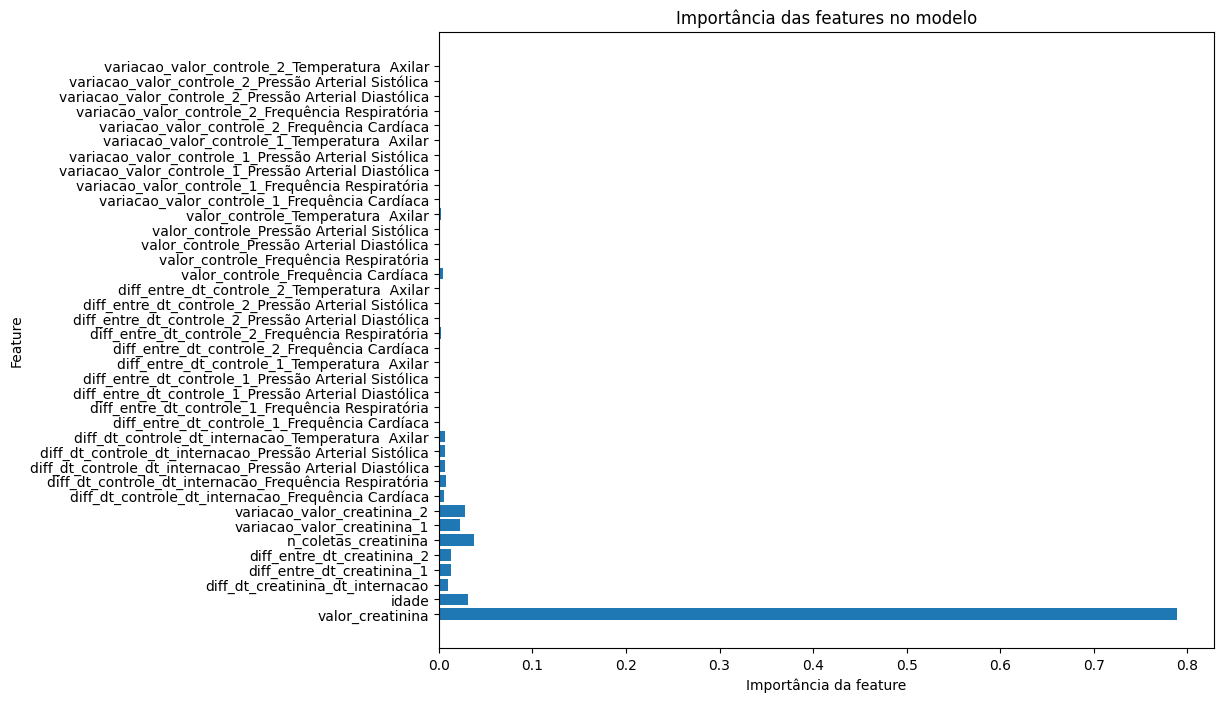

In [149]:
# Visualização da importância das features no modelo
plot_feature_importances(best_regressor.feature_importances_, x_reg_columns)

Vamos verificar o gráfico da plotagem dos valores reais vs o predito. 

Quanto mais distante do valor real mais quente será a cor do ponto. A linha em cinza representa os valores de referencia.

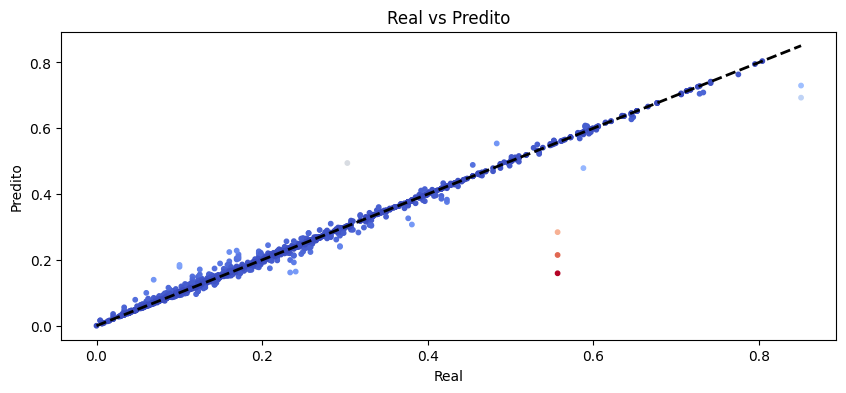

In [150]:
plot_scatter_real_vs_pred(y_reg_test, y_reg_pred, title='Real vs Predito', xlabel='Real', ylabel='Predito')

Este modelo cumpre com excelência o proposito de inferir a creatinina da proxima coleta.

**Exportação**

In [151]:
# Salva o modelo treinado
dump(best_regressor, f'{MODEL_PATH}exp_a_etr_model.pkl')

['../models/exp_a_etr_model.pkl']

**Limpeza de memoria do python**

In [152]:
try:
    del best_regressor, etr_model, random_search
    gc.collect()
except:
    pass

##### 6.2.A.2 Heurística

Com o modelo pronto e salvo, agora aplicaremos a heurística de detecção de IRA para complementar a solução da problemática e avaliar os resultados como um todo.

In [153]:
new_index_y_reg_test = y_reg_test.copy()

Primeiro devemos reconstruir a tabela original

In [154]:
# reconstruct the dataframe with the real and predicted values
# first unite the y_reg_test and y_reg_pred and taking the index of y_reg_test as reference
# rescals the features to the original scale and add the real and predicted values and re-transfrom the timedelta columns to timedelta
df_reg_pred = pd.DataFrame(scaler_reg.inverse_transform(x_reg_test), columns=df_reg.drop(columns=['apresentara_valor_creatinina']).columns)
df_reg_pred['real'] = y_scaler_reg.inverse_transform(new_index_y_reg_test.reshape(-1, 1))
df_reg_pred['predito'] = y_scaler_reg.inverse_transform(y_reg_pred.reshape(-1, 1))
for column in [column for column in df_reg.columns if column.startswith('diff_')]:
    df_reg_pred[column] = pd.to_timedelta(df_reg_pred[column], unit='s')
df_reg_pred

,valor_creatinina,idade,diff_dt_creatinina_dt_internacao,diff_entre_dt_creatinina_1,diff_entre_dt_creatinina_2,n_coletas_creatinina,variacao_valor_creatinina_1,variacao_valor_creatinina_2,diff_dt_controle_dt_internacao_Frequência Cardíaca,diff_dt_controle_dt_internacao_Frequência Respiratória,...,variacao_valor_controle_1_Pressão Arterial Diastólica,variacao_valor_controle_1_Pressão Arterial Sistólica,variacao_valor_controle_1_Temperatura Axilar,variacao_valor_controle_2_Frequência Cardíaca,variacao_valor_controle_2_Frequência Respiratória,variacao_valor_controle_2_Pressão Arterial Diastólica,variacao_valor_controle_2_Pressão Arterial Sistólica,variacao_valor_controle_2_Temperatura Axilar,real,predito
0,0.92,59.00,5 days 00:39:00,1 days 09:38:00,5 days 00:30:00,3.00,-0.02,-0.19,5 days 01:03:00,5 days 01:03:00,...,-0.23,-0.12,-0.02,0.02,0.00,-0.17,-0.14,-0.00,0.96,1.01
1,0.59,69.00,6 days 21:50:00,1 days 02:16:00,2 days 00:55:00,8.00,-0.02,0.13,6 days 14:15:00,6 days 14:15:00,...,0.00,-0.04,-0.02,-0.16,-0.31,0.00,-0.02,-0.03,0.63,0.63
2,0.64,44.00,26 days 02:50:00,1 days 01:46:00,1 days 17:46:00,13.00,-0.04,-0.27,26 days 14:00:00,26 days 14:00:00,...,-0.02,-0.09,0.00,0.19,-0.30,-0.10,-0.12,0.02,0.66,0.66
3,1.12,62.00,23 days 00:31:00,0 days 21:41:00,0 days 23:16:00,8.00,-0.10,0.27,22 days 23:16:00,22 days 23:16:00,...,-0.23,-0.21,-0.03,-0.01,-0.10,-0.19,-0.14,-0.02,0.73,0.73
4,2.64,73.00,53 days 08:25:00,1 days 04:03:00,2 days 03:04:00,36.00,0.25,0.26,53 days 04:51:00,53 days 04:51:00,...,0.10,0.05,-0.01,-0.01,-0.20,-0.10,-0.11,-0.02,2.92,2.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1668,0.90,56.00,21 days 04:25:00,2 days 14:52:00,3 days 11:58:00,13.00,0.06,-0.01,21 days 03:44:00,21 days 03:44:00,...,0.00,0.03,-0.01,-0.35,-0.10,-0.10,0.00,0.01,0.99,0.96
1669,1.46,61.00,12 days 03:01:00,0 days 12:53:00,1 days 21:25:00,11.00,0.59,0.25,11 days 22:08:00,11 days 22:08:00,...,-0.08,-0.10,-0.01,-0.09,0.15,-0.08,-0.11,-0.01,1.31,1.31
1670,3.20,76.00,24 days 22:43:00,0 days 11:54:00,0 days 16:49:00,15.00,0.03,0.03,25 days 13:59:00,25 days 13:59:00,...,-0.14,-0.22,0.09,0.11,0.00,0.26,0.56,0.09,3.25,3.23
1671,1.11,35.00,26 days 01:50:00,1 days 00:04:00,1 days 06:06:00,6.00,0.09,0.19,26 days 03:02:00,26 days 03:02:00,...,-0.09,-0.08,-0.00,-0.03,0.12,-0.08,-0.05,-0.01,1.26,1.26


In [155]:
df_reg_pred = df_reg_pred[['variacao_valor_creatinina_1', 'valor_creatinina', 'real', 'predito']]
df_reg_pred.columns = ['anterior', 'atual', 'proximo', 'predito']

def revert_variacao(row):
    if row['anterior'] == 0:
        return row['atual']
    else:
        return ((row['atual'] - (row['anterior'] * 1e-8))/(1 + row['anterior']))

df_reg_pred['anterior'] = df_reg_pred.apply(revert_variacao, axis=1)
df_reg_pred

,anterior,atual,proximo,predito
0,0.94,0.92,0.96,1.01
1,0.60,0.59,0.63,0.63
2,0.67,0.64,0.66,0.66
3,1.25,1.12,0.73,0.73
4,2.11,2.64,2.92,2.92
...,...,...,...,...
1668,0.85,0.90,0.99,0.96
1669,0.92,1.46,1.31,1.31
1670,3.11,3.20,3.25,3.23
1671,1.02,1.11,1.26,1.26


In [156]:
def variation(row, target: str):
    return ((row[target] - row['anterior'])/(row['anterior'] + 1e-8))

def ira(row, target: str, threshold: float=0.3):
    return 1 if abs(((row[target] - row['anterior'])/(row['anterior'] + 1e-8))) >= threshold else 0

df_reg_pred['proxima_variacao'] = df_reg_pred.apply(lambda row: variation(row, 'proximo'), axis=1)
df_reg_pred['apresentara_ira'] = df_reg_pred.apply(lambda row: ira(row, 'proximo'), axis=1)
df_reg_pred['predito_ira'] = df_reg_pred.apply(lambda row: ira(row, 'predito'), axis=1)
df_reg_pred

,anterior,atual,proximo,predito,proxima_variacao,apresentara_ira,predito_ira
0,0.94,0.92,0.96,1.01,0.02,0,0
1,0.60,0.59,0.63,0.63,0.05,0,0
2,0.67,0.64,0.66,0.66,-0.01,0,0
3,1.25,1.12,0.73,0.73,-0.42,1,1
4,2.11,2.64,2.92,2.92,0.38,1,1
...,...,...,...,...,...,...,...
1668,0.85,0.90,0.99,0.96,0.16,0,0
1669,0.92,1.46,1.31,1.31,0.42,1,1
1670,3.11,3.20,3.25,3.23,0.05,0,0
1671,1.02,1.11,1.26,1.26,0.24,0,0


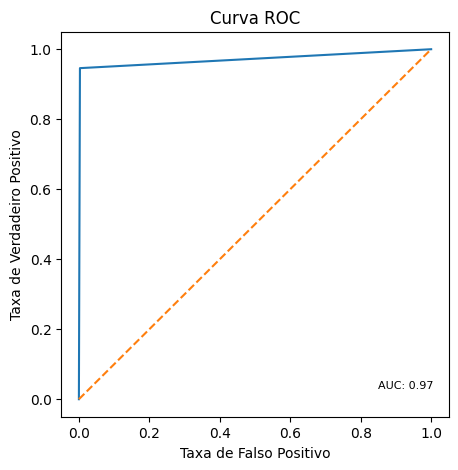

In [177]:
plt.figure(figsize=(5, 5))
fpr, tpr, thresholds = roc_curve(df_reg_pred['apresentara_ira'], df_reg_pred['predito_ira'])
plt.plot(fpr, tpr)
auc_value = auc(fpr, tpr)
plt.text(0.85, 0.03, f'AUC: {auc_value:.2f}', fontsize=8)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.show()

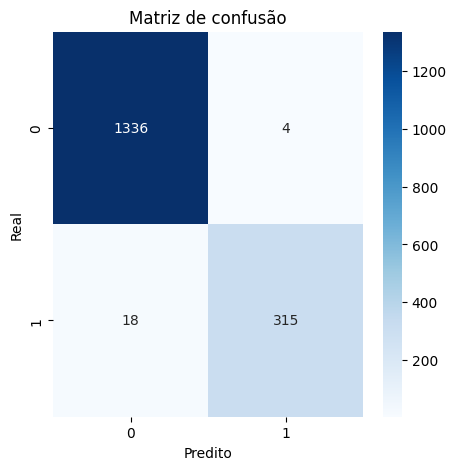

In [175]:
# plot confusion matrix apresentara_ira and predito_ira
plt.figure(figsize=(5, 5))
sns.heatmap(confusion_matrix(df_reg_pred['apresentara_ira'], df_reg_pred['predito_ira']), annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de confusão')
plt.show()


In [167]:
print(classification_report(df_reg_pred['apresentara_ira'], df_reg_pred['predito_ira']))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1340
           1       0.99      0.95      0.97       333

    accuracy                           0.99      1673
   macro avg       0.99      0.97      0.98      1673
weighted avg       0.99      0.99      0.99      1673



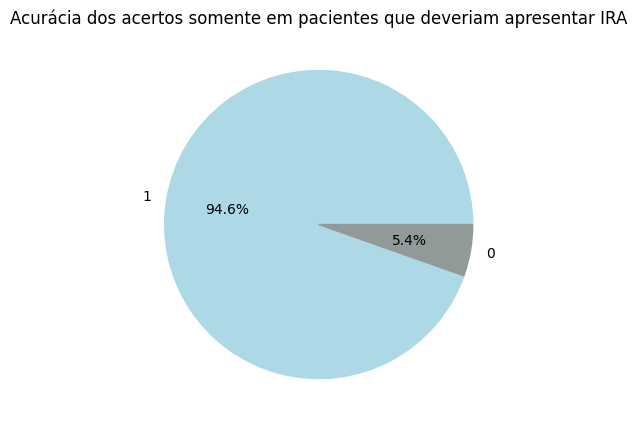

In [179]:
plt.figure(figsize=(5, 5))
df_reg_pred[df_reg_pred['apresentara_ira'] == 1]['predito_ira'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.gca().patches[0].set_color("LightBlue")
try:
    plt.gca().patches[1].set_color("#919999")
except:
    pass
plt.title('Acurácia dos acertos somente em pacientes que deveriam apresentar IRA')
plt.ylabel('')
plt.show()


#### 6.2.2 Classificação

##### 6.2.2.1 Decision Tree

In [161]:
# Defina o modelo DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

# Defina os hiperparâmetros a serem otimizados
param_dist = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
}

# Defina a estratégia de validação cruzada estratificada
stratified_cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Configure a pesquisa aleatória
random_search = RandomizedSearchCV(
    dt_classifier,
    param_distributions=param_dist,
    n_iter=10,  # Número de iterações aleatórias
    scoring='recall',  # Ou outra métrica de avaliação desejada
    cv=stratified_cv,
    random_state=42
)

# Ajuste o modelo aos dados de treino
random_search.fit(x_classf_train, y_classf_train)

# Exiba os melhores hiperparâmetros encontrados
print("Best Hyperparameters:", random_search.best_params_)

# Avalie o modelo nos dados de teste
best_dt_classifier = random_search.best_estimator_
accuracy = random_search.best_estimator_.score(x_classf_val, y_classf_val)
print("Validation Set recall:", accuracy)

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
best_dt_classifier.fit(x_classf_train, y_classf_train)

# Faça previsões no conjunto de teste
y_prob = best_dt_classifier.predict_proba(x_classf_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_classf_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Faça previsões no conjunto de teste para a matriz de confusão
y_pred = best_dt_classifier.predict(x_classf_test)

# Crie a matriz de confusão
conf_matrix = confusion_matrix(y_classf_test, y_pred)

# Plotar a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# unite y_classf_test and y_pred in a dataframe
# create a column to see if they are equal
# if they are equal then the column will be 1
# if they are different then the column will be 0
df_temp = pd.DataFrame()
df_temp['y_classf_test'] = y_classf_test
df_temp['y_pred'] = y_pred
df_temp = df_temp.loc[df_temp['y_classf_test'] == 1]
df_temp['equal'] = df_temp['y_classf_test'] == df_temp['y_pred']
df_temp['equal'] = df_temp['equal'].astype(int)
print(len(df_temp))
print(len(df_temp.loc[df_temp['equal']==1]))
print(df_temp['equal'].value_counts(normalize=True) * 100)
plt.figure(figsize=(5, 5))
# pie chart of the column equal
df_temp['equal'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.xlabel('')
plt.ylabel('')
plt.title('Acuracia dos acertos somente em pacientes que apresentaram IRA')
plt.show()

## 7. Avaliação da Performance de Modelos

## 8. Conclusão